In [1]:
!pip install geopy
!pip install folium
!pip install openpyxl

    100% |████████████████████████████████| 112kB 5.9MB/s ta 0:00:01
    100% |████████████████████████████████| 102kB 9.2MB/s a 0:00:011
    100% |████████████████████████████████| 245kB 13.6MB/s ta 0:00:01
  Running setup.py bdist_wheel for et-xmlfile ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/2a/77/35/0da0965a057698121fc7d8c5a7a9955cdbfb3cc4e2423cad39
Successfully built et-xmlfile


In [2]:
# Load relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from geopy.distance import geodesic
import folium
import folium.plugins as plugins

The county and state ```The Impact of Coronavirus on Food Insecurity Update 10.2020.xlsx``` and ```'MMG2020_2018Data_ToShare.xlsx'```, ```'MMG2019_2017Data_ToShare.xlsx'```. The data's contents and some useful characteristics to note about the data are as follows:

### 'The Impact of Coronavirus on Food Insecurity Update 10.2020.xlsx'
- Total population per County and State from the American Community Survey (ACS) (2014-18 Historical).
- Contains estimated percentage of the total popilation in food-insecure households (Map the Meal Gap 2020 Report, Historical 2018 Data).
- Estimated number of persons in food-insecure households (Map the Meal Gap 2020 Report, Historical 2018 Data).
- Projected percentage of the total population in food-insecure households per Revised Projections – Oct 2020.
- Projected number of total persons in food-insecure households per Revised Projections – Oct 2020.
- Percentage change in the projected overall food insecurity rate between 2018 and 2020 per Revised Projections – Oct 2020.
- Projected additional number of total persons in food-insecure households per Revised Projections – Oct 2020.
- Projected percentage point change in the local annual unemployment rate per Revised Projections – Oct 2020.

In [3]:
# Reading complete xlsx files
# https://stackoverflow.com/questions/16888888/how-to-read-a-xlsx-file-using-the-pandas-library-in-ipython
food_insec_2020 = pd.read_excel('./data/The Impact of Coronavirus on Food Insecurity Update 10.2020.xlsx', sheet_name= None)
food_insec_2018 = pd.read_excel('./data/MMG2020_2018Data_ToShare.xlsx', sheet_name=None)
food_insec_2017 = pd.read_excel('./data/MMG2019_2017Data_ToShare.xlsx', sheet_name=None)

In [4]:
# Checking for sheet names, ensuring spelling and grammar, before reading each separate
# https://stackoverflow.com/questions/55302280/get-separate-dataframes-from-a-dictionary-of-dataframes-python
listing = [food_insec_2020, food_insec_2018, food_insec_2017]
for i in listing:
    print(list(i))

['Key', 'County', 'District', 'State ', 'Citation']
['2018 County', '2018 Cong District', '2018 State', 'Citation']
['2017 County', '2017 Cong District', '2017 State', 'Citation']


In [5]:
# dictionary of dataframes
type(food_insec_2020)

collections.OrderedDict

In [6]:
# Food Insecurity 2020, reading only sheets neccessary for analysis, using 'State ' with white space
food_insec_2020_county = pd.read_excel('./data/The Impact of Coronavirus on Food Insecurity Update 10.2020.xlsx', sheet_name='County')
food_insec_2020_state = pd.read_excel('./data/The Impact of Coronavirus on Food Insecurity Update 10.2020.xlsx', sheet_name='State ')

# Food Insecurity 2018, reading only sheets neccessary for analysis
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html
food_insec_2018_county = pd.read_excel('./data/MMG2020_2018Data_ToShare.xlsx', sheet_name='2018 County',header=1)
food_insec_2018_state = pd.read_excel('./data/MMG2020_2018Data_ToShare.xlsx', sheet_name='2018 State', header=1)

# Food Insecurity 2017, reading only sheets neccessary for analysis
food_insec_2017_county = pd.read_excel('./data/MMG2019_2017Data_ToShare.xlsx', sheet_name='2017 County')#, header=1)
food_insec_2017_state = pd.read_excel('./data/MMG2019_2017Data_ToShare.xlsx', sheet_name='2017 State')#, header=1)

In [7]:
# checking for type
type(food_insec_2020_county)

pandas.core.frame.DataFrame

In [8]:
# Dict to Pandas dataframe
# https://www.marsja.se/how-to-convert-a-python-dictionary-to-a-pandas-dataframe/
# food_insec_2020_county_df = pd.DataFrame(food_insec_2020_county)
# food_insec_2020_state_df = pd.DataFrame(food_insec_2020_state)

In [9]:
# checking shape of each dataframe (number of rows and columns)
# https://stackoverflow.com/questions/51346650/print-variable-name-in-python

dfs_data_name = ['food_insec_2020_county','food_insec_2020_state', 'food_insec_2018_county', 'food_insec_2018_state', 'food_insec_2017_county', 'food_insec_2017_state']
for dataName in dfs_data_name:
    data = eval(dataName)
    print("{} : {}".format(dataName, data.shape))

food_insec_2020_county : (3142, 18)
food_insec_2020_state : (51, 16)
food_insec_2018_county : (3142, 18)
food_insec_2018_state : (51, 18)
food_insec_2017_county : (3142, 18)
food_insec_2017_state : (51, 18)


In [10]:
food_insec_2020_county.tail(3)

,"County, State",FIPS,State,Total Population,2018 Food Insecurity %,2018 Food Insecurity #,[Revised Projections – Oct 2020] 2020 Food Insecurity %,[Revised Projections – Oct 2020] 2020 Food Insecurity #,[Revised Projections – Oct 2020] 2020 Food Insecurity % Change,[Revised Projections – Oct 2020] 2020 Food Insecurity # Change,[Revised Projections – Oct 2020] Adjusted Annual Unemployment Change,Total Child Population,2018 Child Food Insecurity %,2018 Child Food Insecurity #,[Revised Projections – Oct 2020] 2020 Child Food Insecurity %,[Revised Projections – Oct 2020] 2020 Child Food Insecurity #,[Revised Projections – Oct 2020] 2020 Child Food Insecurity % Change,[Revised Projections – Oct 2020] 2020 Child Food Insecurity # Change
3139,"Uinta County, Wyoming",56041,WY,20609,0.135,2780,0.166,3420,23,640,0.046,6071,0.187,1140,0.247,1500,32,360
3140,"Washakie County, Wyoming",56043,WY,8129,0.126,1020,0.152,1230,21,210,0.037,1942,0.184,360,0.233,460,27,100
3141,"Weston County, Wyoming",56045,WY,7100,0.140,990,0.161,1140,15,150,0.027,1505,0.223,340,0.262,400,18,60


In [11]:
# County Dataframe 2018 vs 2020
# Slicing to select interested columns for analysis
food_insec_2020_county2 = food_insec_2020_county.iloc[:,:11]
food_insec_2020_county2.head(3)

,"County, State",FIPS,State,Total Population,2018 Food Insecurity %,2018 Food Insecurity #,[Revised Projections – Oct 2020] 2020 Food Insecurity %,[Revised Projections – Oct 2020] 2020 Food Insecurity #,[Revised Projections – Oct 2020] 2020 Food Insecurity % Change,[Revised Projections – Oct 2020] 2020 Food Insecurity # Change,[Revised Projections – Oct 2020] Adjusted Annual Unemployment Change
0,"Autauga County, Alabama",1001,AL,55200,0.156,8620,0.186,10240,19,1620,0.043
1,"Baldwin County, Alabama",1003,AL,208107,0.129,26860,0.163,33970,26,7110,0.053
2,"Barbour County, Alabama",1005,AL,25782,0.219,5650,0.251,6480,15,830,0.049


In [12]:
food_insec_2020_state.head(1)

,State,Total Population,2018 Food Insecurity %,2018 Food Insecurity #,[Revised Projections – Oct 2020] 2020 Food Insecurity %,[Revised Projections – Oct 2020] 2020 Food Insecurity #,[Revised Projections – Oct 2020] 2020 Food Insecurity % Change,[Revised Projections – Oct 2020] 2020 Food Insecurity # Change,[Revised Projections – Oct 2020] Adjusted Annual Unemployment Change,Total Child Population,2018 Child Food Insecurity %,2018 Child Food Insecurity #,[Revised Projections – Oct 2020] 2020 Child Food Insecurity %,[Revised Projections – Oct 2020] 2020 Child Food Insecurity #,[Revised Projections – Oct 2020] 2020 Child Food Insecurity % Change,[Revised Projections – Oct 2020] 2020 Child Food Insecurity # Change
0,AK,737438,0.129,95190,0.17,125470,32,30280,0.067,183460,0.181,33200,0.261,47840,44,14640


In [13]:
# State Dataframe 2018 vs 2020
# Slicing to select interested columns for analysis
food_insec_2020_state2 = food_insec_2020_state.iloc[:,:9]
food_insec_2020_state2.head(1)

,State,Total Population,2018 Food Insecurity %,2018 Food Insecurity #,[Revised Projections – Oct 2020] 2020 Food Insecurity %,[Revised Projections – Oct 2020] 2020 Food Insecurity #,[Revised Projections – Oct 2020] 2020 Food Insecurity % Change,[Revised Projections – Oct 2020] 2020 Food Insecurity # Change,[Revised Projections – Oct 2020] Adjusted Annual Unemployment Change
0,AK,737438,0.129,95190,0.17,125470,32,30280,0.067


In [14]:
# Note: Total Popultion was calculated with u.s,
print(food_insec_2020_county2.columns)

Index(['County, State', 'FIPS', 'State', 'Total Population',
       '2018 Food Insecurity %', '2018 Food Insecurity #',
       '[Revised Projections – Oct 2020] \n2020 Food Insecurity  %',
       '[Revised Projections – Oct 2020] \n2020 Food Insecurity #',
       '[Revised Projections – Oct 2020] \n2020 Food Insecurity % Change',
       '[Revised Projections – Oct 2020] \n2020 Food Insecurity # Change',
       '[Revised Projections – Oct 2020] \nAdjusted Annual Unemployment Change'],
      dtype='object')


In [15]:
#https://www.datasciencemadesimple.com/strip-space-column-pandas-dataframe-leading-trailing-2/

In [16]:
# Checking for column types
food_insec_2020_county2.dtypes

County, State                                                              object
FIPS                                                                        int64
State                                                                      object
Total Population                                                            int64
2018 Food Insecurity %                                                    float64
2018 Food Insecurity #                                                      int64
[Revised Projections – Oct 2020] \n2020 Food Insecurity  %                float64
[Revised Projections – Oct 2020] \n2020 Food Insecurity #                   int64
[Revised Projections – Oct 2020] \n2020 Food Insecurity % Change            int64
[Revised Projections – Oct 2020] \n2020 Food Insecurity # Change            int64
[Revised Projections – Oct 2020] \nAdjusted Annual Unemployment Change    float64
dtype: object

In [17]:
# Renaming projected 2020 columns
food_insec_2020_county2.rename(columns = {
    '[Revised Projections – Oct 2020] \n2020 Food Insecurity  %':'Proj_2020 Food Insecurity %',
    '[Revised Projections – Oct 2020] \n2020 Food Insecurity #':'Proj_2020 Food Insecurity #',
    '[Revised Projections – Oct 2020] \n2020 Food Insecurity % Change':'Proj_2020 Food Insecurity % change',
    '[Revised Projections – Oct 2020] \n2020 Food Insecurity # Change':'Proj_2020 Food Insecurity # change',
    '[Revised Projections – Oct 2020] \nAdjusted Annual Unemployment Change':'2020 Adjusted Annual Unemployment Change',
    }, inplace = True)
food_insec_2020_county2.head(1)

,"County, State",FIPS,State,Total Population,2018 Food Insecurity %,2018 Food Insecurity #,Proj_2020 Food Insecurity %,Proj_2020 Food Insecurity #,Proj_2020 Food Insecurity % change,Proj_2020 Food Insecurity # change,2020 Adjusted Annual Unemployment Change
0,"Autauga County, Alabama",1001,AL,55200,0.156,8620,0.186,10240,19,1620,0.043


In [18]:
food_insec_2020_state2.dtypes

State                                                                      object
Total Population                                                            int64
2018 Food Insecurity  %                                                   float64
2018 Food Insecurity #                                                      int64
[Revised Projections – Oct 2020] \n2020 Food Insecurity %                 float64
[Revised Projections – Oct 2020] \n2020 Food Insecurity #                   int64
[Revised Projections – Oct 2020] \n2020 Food Insecurity % Change            int64
[Revised Projections – Oct 2020] \n2020 Food Insecurity # Change            int64
[Revised Projections – Oct 2020] \nAdjusted Annual Unemployment Change    float64
dtype: object

In [19]:
# Renaming projected 2020 columns
food_insec_2020_state2.rename(columns = {
    '[Revised Projections – Oct 2020] \n2020 Food Insecurity %':'Proj_2020 Food Insecurity %',
    '[Revised Projections – Oct 2020] \n2020 Food Insecurity #':'Proj_2020 Food Insecurity #',
    '[Revised Projections – Oct 2020] \n2020 Food Insecurity % Change':'Proj_2020 Food Insecurity % change',
    '[Revised Projections – Oct 2020] \n2020 Food Insecurity # Change':'Proj_2020 Food Insecurity # change',
    '[Revised Projections – Oct 2020] \nAdjusted Annual Unemployment Change':'2020 Adjusted Annual Unemployment Change',
    }, inplace = True)
food_insec_2020_state2.head(1)

,State,Total Population,2018 Food Insecurity %,2018 Food Insecurity #,Proj_2020 Food Insecurity %,Proj_2020 Food Insecurity #,Proj_2020 Food Insecurity % change,Proj_2020 Food Insecurity # change,2020 Adjusted Annual Unemployment Change
0,AK,737438,0.129,95190,0.17,125470,32,30280,0.067


In [20]:
# checking 
# food_insec_2017_county.head()

In [21]:
food_insec_2020_county2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 11 columns):
County, State                               3142 non-null object
FIPS                                        3142 non-null int64
State                                       3142 non-null object
Total Population                            3142 non-null int64
2018 Food Insecurity %                      3142 non-null float64
2018 Food Insecurity #                      3142 non-null int64
Proj_2020 Food Insecurity %                 3142 non-null float64
Proj_2020 Food Insecurity #                 3142 non-null int64
Proj_2020 Food Insecurity % change          3142 non-null int64
Proj_2020 Food Insecurity # change          3142 non-null int64
2020 Adjusted Annual Unemployment Change    3142 non-null float64
dtypes: float64(3), int64(6), object(2)
memory usage: 270.1+ KB


In [22]:
# Checking for nan values
# https://datatofish.com/check-nan-pandas-dataframe/
print(food_insec_2020_county2.isnull().values.any())
print(food_insec_2020_state2.isnull().values.any())
print(food_insec_2020_county2.isnull().sum().sum())
print(food_insec_2020_state2.isnull().sum().sum())

False
False
0
0


In [23]:
# removing any trailing space from 'county, state' column, and making values lower case for easier manipulation
# https://stackoverflow.com/questions/34130416/how-to-strip-and-uppercase-a-column-in-a-dataframe-derived-from-excel-file-av

food_insec_2020_county2['County, State'] = food_insec_2020_county2['County, State'].str.strip().str.lower()
food_insec_2020_county2['State'] = food_insec_2020_county2['State'].str.strip()

food_insec_2020_county2['County, State'].head(3)
# food_insec_2020_county2['State'].head(3)

0    autauga county, alabama
1    baldwin county, alabama
2    barbour county, alabama
Name: County, State, dtype: object

In [24]:
# Checking for number of counties per State
food_insec_2020_county2.groupby('State')['County, State'].count().sort_values(ascending=False)

State
TX    254
GA    159
VA    133
KY    120
MO    115
KS    105
IL    102
NC    100
IA     99
TN     95
NE     93
IN     92
OH     88
MN     87
MI     83
MS     82
OK     77
AR     75
WI     72
FL     67
PA     67
AL     67
SD     66
CO     64
LA     64
NY     62
CA     58
MT     56
WV     55
ND     53
SC     46
ID     44
WA     39
OR     36
NM     33
AK     29
UT     29
MD     24
WY     23
NJ     21
NV     17
ME     16
AZ     15
MA     14
VT     14
NH     10
CT      8
HI      5
RI      5
DE      3
DC      1
Name: County, State, dtype: int64

In [25]:
# Checking for King County, Washington 
# Add separeate column for state spelled
food_insec_2020_county2[food_insec_2020_county2['County, State']=='king county, washington']

,"County, State",FIPS,State,Total Population,2018 Food Insecurity %,2018 Food Insecurity #,Proj_2020 Food Insecurity %,Proj_2020 Food Insecurity #,Proj_2020 Food Insecurity % change,Proj_2020 Food Insecurity # change,2020 Adjusted Annual Unemployment Change
2969,"king county, washington",53033,WA,2163257,0.095,204850,0.134,289980,42,85130,0.063


In [26]:
# Playing around with washington county 
food_insec_2020_county2[food_insec_2020_county2['State'] == 'WA'].groupby('County, State')['County, State'].count().sort_values(ascending=False)

County, State
yakima county, washington          1
ferry county, washington           1
king county, washington            1
jefferson county, washington       1
island county, washington          1
grays harbor county, washington    1
grant county, washington           1
garfield county, washington        1
franklin county, washington        1
douglas county, washington         1
kittitas county, washington        1
cowlitz county, washington         1
columbia county, washington        1
clark county, washington           1
clallam county, washington         1
chelan county, washington          1
benton county, washington          1
asotin county, washington          1
kitsap county, washington          1
klickitat county, washington       1
whitman county, washington         1
skamania county, washington        1
whatcom county, washington         1
walla walla county, washington     1
wahkiakum county, washington       1
thurston county, washington        1
stevens county, washingt

In [27]:
food_insec_2020_county2.head(3)

,"County, State",FIPS,State,Total Population,2018 Food Insecurity %,2018 Food Insecurity #,Proj_2020 Food Insecurity %,Proj_2020 Food Insecurity #,Proj_2020 Food Insecurity % change,Proj_2020 Food Insecurity # change,2020 Adjusted Annual Unemployment Change
0,"autauga county, alabama",1001,AL,55200,0.156,8620,0.186,10240,19,1620,0.043
1,"baldwin county, alabama",1003,AL,208107,0.129,26860,0.163,33970,26,7110,0.053
2,"barbour county, alabama",1005,AL,25782,0.219,5650,0.251,6480,15,830,0.049


In [28]:
food_insec_2020_state2.head(3)

,State,Total Population,2018 Food Insecurity %,2018 Food Insecurity #,Proj_2020 Food Insecurity %,Proj_2020 Food Insecurity #,Proj_2020 Food Insecurity % change,Proj_2020 Food Insecurity # change,2020 Adjusted Annual Unemployment Change
0,AK,737438,0.129,95190,0.170,125470,32,30280,0.067
1,AL,4887871,0.170,829220,0.203,993240,20,164020,0.052
2,AR,3013825,0.173,521490,0.205,617010,18,95520,0.048


### Seattle Data

In [28]:
Seattle_data = pd.read_csv("./data/Seattle/SeattleData.csv")
print(Seattle_data.columns)
print(Seattle_data.info())
Seattle_data.head()

Index(['Food Resource Type', 'Agency', 'Location', 'Operational Status',
       'Operational Notes', 'Current Process for Distribution',
       'Who They Serve', 'Address', 'Latitude', 'Longitude', 'Phone Number',
       'Website', 'Days/Hours', 'Date Updated'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 14 columns):
Food Resource Type                  610 non-null object
Agency                              610 non-null object
Location                            565 non-null object
Operational Status                  610 non-null object
Operational Notes                   592 non-null object
Current Process for Distribution    607 non-null object
Who They Serve                      608 non-null object
Address                             605 non-null object
Latitude                            607 non-null float64
Longitude                           607 non-null float64
Phone Number                        295 non-null

,Food Resource Type,Agency,Location,Operational Status,Operational Notes,Current Process for Distribution,Who They Serve,Address,Latitude,Longitude,Phone Number,Website,Days/Hours,Date Updated
0,Food Bank,Algona/Pacific Food Pantry,NaN,Open,Distributing prepacked boxes or bags,Drive Up/Walk Up,General Public,"603 3rd Ave SE, Pacific, WA 98047",47.265011,-122.236771,(253)-351-0450,http://networks.whyhunger.org/organization/vie...,Tues\n10:00 am - 1:00 pm,10/29/2020 12:00:00 AM
1,Food Bank & Meal,Asian Counseling and Referral Service (ACRS),ACRS Food Bank and Meals,Limited Operations,Emergency Food and Meal Delivery: Call Jo Pull...,Home Delivery,General Public,"919 S King St, Seattle, WA 98104",47.598214,-122.320193,(206)-774-2420,http://www.acrs.org/services/aging-services-fo...,Home Delivery only,10/29/2020 12:00:00 AM
2,Meal,Asian Counseling and Referral Service (ACRS),Kent Memorial Park (Nepali and Samoan Meal Pro...,Limited Operations,Emergency Food and Meal Delivery: Call Jo Pull...,Home Delivery,Older Adults 60+ and Eligible Participants,"850 Central Avenue N, Kent, WA 98032",47.390164,-122.230471,(253)-856-5000,http://www.kentwa.gov/Home/Components/Facility...,Home Delivery ONLY,10/30/2020 12:00:00 AM
3,Meal,Asian Counseling and Referral Service (ACRS),Duoc Su Senior Nutr. Program,Limited Operations,Emergency Food and Meal Delivery: Call Jo Pull...,Home Delivery,Older Adults 60+ and Eligible Participants,"6924 42nd Ave S , Seattle, WA 98118",47.540000,-122.280317,(206)-695-7510,http://www.acrs.org/services/aging-services-fo...,To-go Meals Only,10/30/2020 12:00:00 AM
4,Meal,Asian Counseling and Referral Service (ACRS),Friendly Island of Tonga Seniors,Limited Operations,Emergency Food and Meal Delivery: Call Jo Pull...,Home Delivery,Older Adults 60+ and Eligible Participants,"4620 SW Graham Street, Seattle, WA 98136",47.546979,-122.392267,(206)-695-7510,http://www.acrs.org/services/aging-services-fo...,To-go and Delivered Meals,10/01/2020 12:00:00 AM


In [29]:
Seattle_data[["Street", "Location_Name", "State", 3]] = Seattle_data["Address"].str.split(",", expand=True)

Seattle_data = Seattle_data.drop(columns = [3])
Seattle_data

,Food Resource Type,Agency,Location,Operational Status,Operational Notes,Current Process for Distribution,Who They Serve,Address,Latitude,Longitude,Phone Number,Website,Days/Hours,Date Updated,Street,Location_Name,State
0,Food Bank,Algona/Pacific Food Pantry,NaN,Open,Distributing prepacked boxes or bags,Drive Up/Walk Up,General Public,"603 3rd Ave SE, Pacific, WA 98047",47.265011,-122.236771,(253)-351-0450,http://networks.whyhunger.org/organization/vie...,Tues\n10:00 am - 1:00 pm,10/29/2020 12:00:00 AM,603 3rd Ave SE,Pacific,WA 98047
1,Food Bank & Meal,Asian Counseling and Referral Service (ACRS),ACRS Food Bank and Meals,Limited Operations,Emergency Food and Meal Delivery: Call Jo Pull...,Home Delivery,General Public,"919 S King St, Seattle, WA 98104",47.598214,-122.320193,(206)-774-2420,http://www.acrs.org/services/aging-services-fo...,Home Delivery only,10/29/2020 12:00:00 AM,919 S King St,Seattle,WA 98104
2,Meal,Asian Counseling and Referral Service (ACRS),Kent Memorial Park (Nepali and Samoan Meal Pro...,Limited Operations,Emergency Food and Meal Delivery: Call Jo Pull...,Home Delivery,Older Adults 60+ and Eligible Participants,"850 Central Avenue N, Kent, WA 98032",47.390164,-122.230471,(253)-856-5000,http://www.kentwa.gov/Home/Components/Facility...,Home Delivery ONLY,10/30/2020 12:00:00 AM,850 Central Avenue N,Kent,WA 98032
3,Meal,Asian Counseling and Referral Service (ACRS),Duoc Su Senior Nutr. Program,Limited Operations,Emergency Food and Meal Delivery: Call Jo Pull...,Home Delivery,Older Adults 60+ and Eligible Participants,"6924 42nd Ave S , Seattle, WA 98118",47.540000,-122.280317,(206)-695-7510,http://www.acrs.org/services/aging-services-fo...,To-go Meals Only,10/30/2020 12:00:00 AM,6924 42nd Ave S,Seattle,WA 98118
4,Meal,Asian Counseling and Referral Service (ACRS),Friendly Island of Tonga Seniors,Limited Operations,Emergency Food and Meal Delivery: Call Jo Pull...,Home Delivery,Older Adults 60+ and Eligible Participants,"4620 SW Graham Street, Seattle, WA 98136",47.546979,-122.392267,(206)-695-7510,http://www.acrs.org/services/aging-services-fo...,To-go and Delivered Meals,10/01/2020 12:00:00 AM,4620 SW Graham Street,Seattle,WA 98136
5,Meal,Asian Counseling and Referral Service (ACRS),Laotian Senior Club,Limited Operations,Emergency Food and Meal Delivery: Call Jo Pull...,Home Delivery,Older Adults 60+ and Eligible Participants,"5740 Martin Luther King Jr Way S, Seattle, WA ...",47.550047,-122.287136,(206)-695-7510,http://www.acrs.org/services/aging-services-fo...,"Meal and Grocery Delivery:\nWed, Fri: 11:30 am...",10/01/2020 12:00:00 AM,5740 Martin Luther King Jr Way S,Seattle,WA 98118
6,Meal,Asian Counseling and Referral Service (ACRS),Club Bamboo and Hmong Senior Club,Limited Operations,Emergency Food and Meal Delivery: Call Jo Pull...,Home Delivery,Older Adults 60+ and Eligible Participants,"3639 Martin Luther King Jr Way S, Seattle, WA ...",47.570897,-122.297388,(206)-695-7510,http://www.acrs.org/services/aging-services-fo...,"Meal and Grocery Delivery:\nMon, Tues, Wed, Th...",10/01/2020 12:00:00 AM,3639 Martin Luther King Jr Way S,Seattle,WA 98144
7,Meal,Asian Counseling and Referral Service (ACRS),Seattle Korean Elders Assoc Center Park - SHA,Limited Operations,Emergency Food and Meal Delivery: Call Jo Pull...,Home Delivery,Older Adults 60+ and Eligible Participants,"2121 26th Ave S, Seattle, WA 98144",47.584208,-122.299664,(206)-695-7510,http://www.acrs.org/services/aging-services-fo...,"Meal and Grocery Delivery:\nTues, Fri: 12:00 p...",10/01/2020 12:00:00 AM,2121 26th Ave S,Seattle,WA 98144
8,Meal,Asian Counseling and Referral Service (ACRS),Vietnamese Senior Assoc. Garfield Community Ce...,Limited Operations,Emergency Food and Meal Delivery: Call Jo Pull...,Home Delivery,Older Adults 60+ and Eligible Participants,"2323 E Cherry St, Seattle, WA 98112",47.607695,-122.302113,(206)-695-7510,http://www.acrs.org/services/aging-services-fo...,"Meal and Grocery Delivery:\nTues, Fri: 12:00 p...",10/01/2020 12:

In [32]:
grouped_seattle_data = Seattle_data.groupby(pd.Grouper(key="Location_Name"), sort=True).count()
grouped_seattle_data= grouped_seattle_data.drop(columns=['Food Resource Type', 'Location', 'Operational Status',
       'Operational Notes', 'Current Process for Distribution',
       'Who They Serve', 'Address', 'Latitude', 'Longitude', 'Phone Number',
       'Website', 'Days/Hours', 'Date Updated', 'Street', 'State'])
grouped_seattle_data=grouped_seattle_data.rename(columns={"Agency": "Total Number of Food Banks"})
grouped_seattle_data = grouped_seattle_data.reset_index()
grouped_seattle_data = grouped_seattle_data.sort_values('Location_Name')
grouped_seattle_data

,Location_Name,Total Number of Food Banks
3,Auburn,28
46,Baring,1
5,Bellevue,18
6,Black Diamond,3
29,Bothell,25
40,Bothell WA 9801,1
39,Bothell WA 98011,1
23,Burien,6
25,Carnation,5
33,Covington,6


In [33]:
#We are dropping the closed facilities. We are droppingthe columns that are non operational 

OverallCount_data = pd.read_csv("./data/Seattle/overall-counts-rates-geography-nov-10- City.csv")
print(OverallCount_data.columns)
print(OverallCount_data.info())
OverallCount_data.head()

Index(['Location_Name', 'Population', 'People_Tested', 'People_Tested_Rate',
       'All_Test_Results', 'All_Test_Results_Rate', 'Positives',
       'Positive_Rate', 'Hospitalizations', 'Hospitalization_Rate', 'Deaths',
       'Death_Rate'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 12 columns):
Location_Name            60 non-null object
Population               60 non-null int64
People_Tested            60 non-null int64
People_Tested_Rate       60 non-null float64
All_Test_Results         60 non-null int64
All_Test_Results_Rate    60 non-null float64
Positives                60 non-null int64
Positive_Rate            60 non-null float64
Hospitalizations         60 non-null int64
Hospitalization_Rate     60 non-null float64
Deaths                   60 non-null int64
Death_Rate               60 non-null float64
dtypes: float64(5), int64(6), object(1)
memory usage: 5.7+ KB
None


,Location_Name,Population,People_Tested,People_Tested_Rate,All_Test_Results,All_Test_Results_Rate,Positives,Positive_Rate,Hospitalizations,Hospitalization_Rate,Deaths,Death_Rate
0,All King County,2226300,575514,25850.69,937503,42110.36,31576,1418.32,2744,123.25,816,36.65
1,Algona,3190,688,21567.40,893,27993.73,106,3322.88,7,219.44,1,31.35
2,Auburn,71740,16149,22510.45,22902,31923.61,1940,2704.21,170,236.97,34,47.39
3,Beaux Arts Village,300,123,41000.00,193,64333.33,9,3000.00,1,333.33,0,0.00
4,Bellevue,145300,28382,19533.38,40716,28022.02,1320,908.47,152,104.61,41,28.22


In [34]:
deaths_seattle = OverallCount_data.groupby(pd.Grouper(key='Location_Name'), sort='true').sum()
deaths_seattle = deaths_seattle.drop(axis=1, labels=['People_Tested', 'People_Tested_Rate',
       'All_Test_Results', 'All_Test_Results_Rate',
       'Positive_Rate', 'Hospitalizations', 'Hospitalization_Rate'])
deaths_seattle = deaths_seattle.reset_index()
deaths_seattle

,Location_Name,Population,Positives,Deaths,Death_Rate
0,All King County,2226300,31576,816,36.65
1,Algona,3190,106,1,31.35
2,Auburn,71740,1940,34,47.39
3,Beaux Arts Village,300,9,0,0.00
4,Bellevue,145300,1320,41,28.22
5,Black Diamond,4525,44,1,22.10
6,Bothell,28570,246,14,49.00
7,Boulevard Park,3723,96,1,26.86
8,Bryn Mawr-Skyway,18347,294,6,32.70
9,Burien,52000,1053,25,48.08


In [35]:
food_banks_deaths  =  deaths_seattle.join(grouped_seattle_data, lsuffix= "_left", rsuffix="_right")
food_banks_deaths

,Location_Name_left,Population,Positives,Deaths,Death_Rate,Location_Name_right,Total Number of Food Banks
0,All King County,2226300,31576,816,36.65,Pacific,5.0
1,Algona,3190,106,1,31.35,Seattle,207.0
2,Auburn,71740,1940,34,47.39,Kent,49.0
3,Beaux Arts Village,300,9,0,0.00,Auburn,28.0
4,Bellevue,145300,1320,41,28.22,Vashon,4.0
5,Black Diamond,4525,44,1,22.10,Bellevue,18.0
6,Bothell,28570,246,14,49.00,Black Diamond,3.0
7,Boulevard Park,3723,96,1,26.86,Des Moines,10.0
8,Bryn Mawr-Skyway,18347,294,6,32.70,SeaTac,12.0
9,Burien,52000,1053,25,48.08,Issaquah,8.0


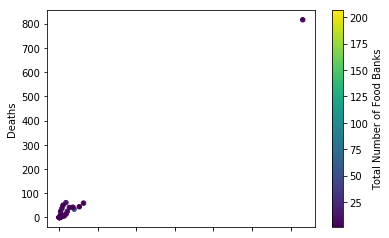

In [36]:
ax2 = food_banks_deaths.plot.scatter(x='Positives',
                      y='Deaths',
                      c='Total Number of Food Banks',
                      colormap='viridis')

In [37]:
#removing "All King County" and "Seattle" 
no_all = OverallCount_data.drop(labels=[0,48])
no_all

,Location_Name,Population,People_Tested,People_Tested_Rate,All_Test_Results,All_Test_Results_Rate,Positives,Positive_Rate,Hospitalizations,Hospitalization_Rate,Deaths,Death_Rate
1,Algona,3190,688,21567.40,893,27993.73,106,3322.88,7,219.44,1,31.35
2,Auburn,71740,16149,22510.45,22902,31923.61,1940,2704.21,170,236.97,34,47.39
3,Beaux Arts Village,300,123,41000.00,193,64333.33,9,3000.00,1,333.33,0,0.00
4,Bellevue,145300,28382,19533.38,40716,28022.02,1320,908.47,152,104.61,41,28.22
5,Black Diamond,4525,967,21370.17,1300,28729.28,44,972.38,1,22.10,1,22.10
6,Bothell,28570,5904,20665.03,8491,29719.99,246,861.04,27,94.50,14,49.00
7,Boulevard Park,3723,977,26242.28,1536,41257.05,96,2578.57,8,214.88,1,26.86
8,Bryn Mawr-Skyway,18347,4069,22178.01,6353,34626.91,294,1602.44,22,119.91,6,32.70
9,Burien,52000,12015,23105.77,18327,35244.23,1053,2025.00,112,215.38,25,48.08
10,Carnation,2220,326,14684.68,460,20720.72,18,810.81,0,0.00,0,0.00


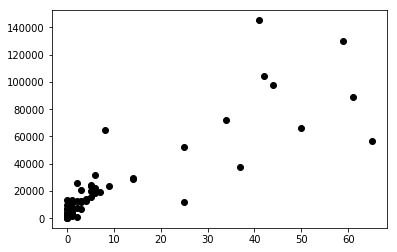

In [38]:
x = no_all['Deaths']
y = no_all['Population']

plt.plot(x, y, 'o', color='black');

#One is all king county, we will drop the first row

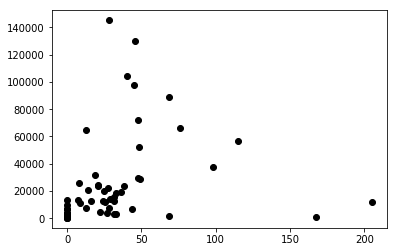

In [39]:
x = no_all['Death_Rate']
y = no_all['Population']

plt.plot(x, y, 'o', color='black');

In [40]:
#Drops all NaN values from dataframe
Seattle_data = Seattle_data.dropna()

In [41]:
#This map contains foodbanks, food pantries, and agencies
folium_map = folium.Map(location=[47.265011,-122.236771],
                        zoom_start=12,
                        tiles='CartoDB dark_matter')


plugins.FastMarkerCluster(data=list(zip(Seattle_data['Latitude'].values, Seattle_data['Longitude'].values))).add_to(folium_map)
folium.LayerControl().add_to(folium_map)
folium_map

In [42]:
latlon = pd.read_csv("./data/Seattle/latlong_wacities.csv")
citiespop = pd.read_csv("./data/Seattle/popden_city.csv")
print(latlon.columns)
print(citiespop.columns)

Index(['latitude', 'longitude', 'location'], dtype='object')
Index(['City/Town Name', 'County Name', 'Population 2020', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'],
      dtype='object')


In [43]:
latlon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 3 columns):
latitude     33 non-null float64
longitude    33 non-null float64
location     33 non-null object
dtypes: float64(2), object(1)
memory usage: 872.0+ bytes


In [44]:
citiespop.drop(['Unnamed: 3','Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'], axis=1,inplace=True)
citiespop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 3 columns):
City/Town Name     281 non-null object
County Name        281 non-null object
Population 2020    281 non-null float64
dtypes: float64(1), object(2)
memory usage: 6.7+ KB


In [45]:
merged_latlon = latlon.merge(citiespop, left_on="location", right_on="City/Town Name")
merged_latlon.drop(["County Name","location"], axis=1, inplace=True)
merged_latlon["Population 2020"].astype(int)
merged_latlon

,latitude,longitude,City/Town Name,Population 2020
0,48.80,122.53,Bellingham,91610.0
1,47.48,122.77,Bremerton,41750.0
2,48.50,122.33,Burlington,9270.0
3,48.88,118.47,Colville,4750.0
4,47.32,119.52,Ephrata,8210.0
5,46.97,123.97,Hoquiam,8540.0
6,47.20,119.32,Moses Lake,24620.0
7,48.25,122.68,Oak Harbor,22910.0
8,46.97,122.90,Olympia,54150.0
9,48.42,119.53,Omak,4955.0


In [46]:
max_amount = float(merged_latlon['Population 2020'].max())
folium_hmap = folium.Map(location=[47.265011,-122.236771],
                        zoom_start=9,
                        tiles="OpenStreetMap")
hm_wide = plugins.HeatMap( list(zip(merged_latlon['latitude'], merged_latlon['longitude'], merged_latlon['Population 2020'])),
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=8, blur=6, 
                   max_zoom=25, 
                 )
plugins.FastMarkerCluster(data=list(zip(Seattle_data['Latitude'].values, Seattle_data['Longitude'].values))).add_to(folium_hmap)
# folium.LayerControl().add_to(folium_hmap)
folium_hmap.add_child(hm_wide)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  if __name__ == '__main__':


### Boston Data

In [47]:
DeathsReported = pd.read_csv("./data/Boston/DeathsReported.csv")
print(DeathsReported.columns)
print(DeathsReported.info())
DeathsReported.head()

Index(['Date', 'DeathsConfTotal', 'DeathsConfNew', 'DeathsProbTotal',
       'DeathsProbNew'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
Date               193 non-null object
DeathsConfTotal    193 non-null int64
DeathsConfNew      193 non-null int64
DeathsProbTotal    101 non-null float64
DeathsProbNew      101 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 7.6+ KB
None


,Date,DeathsConfTotal,DeathsConfNew,DeathsProbTotal,DeathsProbNew
0,6/1/2020,6894,48,NaN,NaN
1,6/2/2020,6944,50,NaN,NaN
2,6/3/2020,7012,68,NaN,NaN
3,6/4/2020,7062,50,NaN,NaN
4,6/5/2020,7097,35,NaN,NaN


In [48]:
DeathsReported=DeathsReported.drop(columns=['DeathsProbTotal', 'DeathsProbNew'])
DeathsReported=DeathsReported.rename(columns={"DeathsConfTotal": "Total Deaths", "DeathsConfNew": "New Deaths"})
DeathsReported.head()

,Date,Total Deaths,New Deaths
0,6/1/2020,6894,48
1,6/2/2020,6944,50
2,6/3/2020,7012,68
3,6/4/2020,7062,50
4,6/5/2020,7097,35


In [49]:
DeathsReported_prev = pd.read_csv("./data/Boston/COVID-19 Dashboard Files 05-31-2020/DeathsReported.csv")
print(DeathsReported_prev.columns)
print(DeathsReported_prev.info())
DeathsReported_prev=DeathsReported_prev.rename(columns={"Deaths": "Total Deaths", "New": "New Deaths"})
DeathsReported_prev.head()

Index(['Date', 'Deaths', 'New'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 3 columns):
Date      92 non-null object
Deaths    92 non-null int64
New       92 non-null int64
dtypes: int64(2), object(1)
memory usage: 2.2+ KB
None


,Date,Total Deaths,New Deaths
0,3/1/2020,0,0
1,3/2/2020,0,0
2,3/3/2020,0,0
3,3/4/2020,0,0
4,3/5/2020,0,0


In [50]:
tot_deaths = DeathsReported_prev.append(DeathsReported, sort=False)
print(tot_deaths.columns)
print(tot_deaths.info())
tot_deaths.head()

Index(['Date', 'Total Deaths', 'New Deaths'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 285 entries, 0 to 192
Data columns (total 3 columns):
Date            285 non-null object
Total Deaths    285 non-null int64
New Deaths      285 non-null int64
dtypes: int64(2), object(1)
memory usage: 8.9+ KB
None


,Date,Total Deaths,New Deaths
0,3/1/2020,0,0
1,3/2/2020,0,0
2,3/3/2020,0,0
3,3/4/2020,0,0
4,3/5/2020,0,0


In [51]:
tot_deaths.tail()

,Date,Total Deaths,New Deaths
188,12/8/2020,10833,40
189,12/9/2020,10922,89
190,12/10/2020,10963,41
191,12/11/2020,11010,47
192,12/12/2020,11057,47


In [52]:
cases = pd.read_csv("./data/Boston/Cases.csv")
print(cases.columns)
print(cases.info())
cases=cases.drop(columns=['Probable Total', 'Probable New', 'Estimated active cases'])
cases=cases.rename(columns={"Date": "Date1"})
cases.head()

Index(['Date', 'Positive Total', 'Positive New', 'Probable Total',
       'Probable New', 'Estimated active cases'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
Date                      193 non-null object
Positive Total            193 non-null int64
Positive New              193 non-null int64
Probable Total            101 non-null float64
Probable New              101 non-null float64
Estimated active cases    40 non-null float64
dtypes: float64(3), int64(2), object(1)
memory usage: 9.1+ KB
None


,Date1,Positive Total,Positive New
0,6/1/2020,97291,326
1,6/2/2020,97539,248
2,6/3/2020,97964,425
3,6/4/2020,98376,412
4,6/5/2020,98796,420


In [744]:
cases_prev = pd.read_csv("./data/Boston/COVID-19 Dashboard Files 05-31-2020/Cases.csv")
print(cases_prev.columns)
print(cases_prev.info())
cases_prev=cases_prev.drop(columns=['Presumptive +', 'Cases'])
cases_prev=cases_prev.rename(columns={"Positive": "Positive Total", "New": "Positive New", "Date": "Date1"})
cases_prev.head()

Index(['Date', 'Positive', 'Presumptive +', 'Cases', 'New'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 5 columns):
Date             92 non-null object
Positive         92 non-null int64
Presumptive +    92 non-null int64
Cases            92 non-null int64
New              92 non-null int64
dtypes: int64(4), object(1)
memory usage: 3.7+ KB
None


,Date1,Positive Total,Positive New
0,3/1/2020,0,0
1,3/2/2020,0,1
2,3/3/2020,0,0
3,3/4/2020,0,0
4,3/5/2020,1,2


In [745]:
tot_cases = cases_prev.append(cases, sort=False)
print(tot_cases.columns)
print(tot_cases.info())
tot_cases.head()

Index(['Date1', 'Positive Total', 'Positive New'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 285 entries, 0 to 192
Data columns (total 3 columns):
Date1             285 non-null object
Positive Total    285 non-null int64
Positive New      285 non-null int64
dtypes: int64(2), object(1)
memory usage: 8.9+ KB
None


,Date1,Positive Total,Positive New
0,3/1/2020,0,0
1,3/2/2020,0,1
2,3/3/2020,0,0
3,3/4/2020,0,0
4,3/5/2020,1,2


In [746]:
tot_cases.tail()

,Date1,Positive Total,Positive New
188,12/8/2020,253649,3627
189,12/9/2020,259324,5675
190,12/10/2020,264454,5130
191,12/11/2020,269929,5475
192,12/12/2020,274897,4968


In [747]:
Massachusetts_total = pd.concat([tot_deaths, tot_cases.reindex(tot_deaths.index)], axis=1)
Massachusetts_total = Massachusetts_total.drop(columns=['Date1'])
Massachusetts_total.head()


,Date,Total Deaths,New Deaths,Positive Total,Positive New
0,3/1/2020,0,0,0,0
1,3/2/2020,0,0,0,1
2,3/3/2020,0,0,0,0
3,3/4/2020,0,0,0,0
4,3/5/2020,0,0,1,2


In [748]:
Massachusetts_total.tail()


,Date,Total Deaths,New Deaths,Positive Total,Positive New
188,12/8/2020,10833,40,253649,3627
189,12/9/2020,10922,89,259324,5675
190,12/10/2020,10963,41,264454,5130
191,12/11/2020,11010,47,269929,5475
192,12/12/2020,11057,47,274897,4968


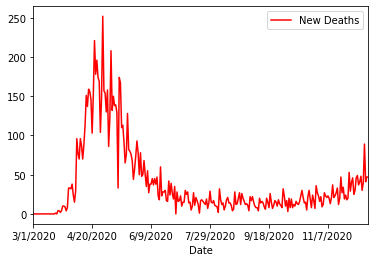

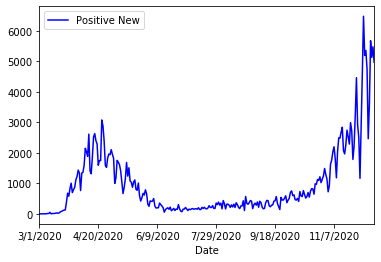

In [749]:
lines = Massachusetts_total.plot.line(x='Date', y='New Deaths', color = 'red')
lines = Massachusetts_total.plot.line(x='Date', y='Positive New', color = 'blue')

In [750]:
foodbanks = pd.read_csv("./data/Boston/All_agency_the_greater_boston_food_bank.csv")
print(foodbanks.columns)
print(foodbanks.info())
foodbanks.head()

Index(['Name', 'Type of Desc.', 'Street', 'City', 'County', 'Zip',
       'FY2019_Lbs', 'F12mo_Lbs'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 8 columns):
Name             229 non-null object
Type of Desc.    229 non-null object
Street           229 non-null object
City             229 non-null object
County           229 non-null object
Zip              229 non-null int64
FY2019_Lbs       210 non-null object
F12mo_Lbs        210 non-null object
dtypes: int64(1), object(7)
memory usage: 14.4+ KB
None


,Name,Type of Desc.,Street,City,County,Zip,FY2019_Lbs,F12mo_Lbs
0,Salvation Army/Cambridge Food Pantry,Food Pantry,402 Massachusetts Ave.,Cambridge,Middlesex,2139,"21,045","50,449"
1,Church of God of Prophecy/Roxbury,Food Pantry,270 Warren St,Roxbury,Suffolk,2119,"88,579","77,065"
2,Open Pantry of Greater Lowell,Food Pantry,13 Hurd St.,Lowell,Middlesex,1852,"433,716","363,026"
3,St. Paul's AME Church Pantry,Food Pantry,85 Bishop Allen Drive,Cambridge,Middlesex,2139,"89,143","51,705"
4,Salvation Army/Kroc Ctr Emerg Food Pntry,Food Pantry,650 Dudley Street,Dorchester,Suffolk,2125,"60,327","547,429"


In [751]:
foodbanks['Type of Desc.'].unique() 

array(['Food Pantry', 'Meal Program/Soup Kitchen'], dtype=object)

In [752]:
foodbanks['Address'] = foodbanks['Street'].map(str) + ' ' + foodbanks['City'].map(str) + ' ' + foodbanks['Zip'].map(str)
foodbanks.head()

,Name,Type of Desc.,Street,City,County,Zip,FY2019_Lbs,F12mo_Lbs,Address
0,Salvation Army/Cambridge Food Pantry,Food Pantry,402 Massachusetts Ave.,Cambridge,Middlesex,2139,"21,045","50,449",402 Massachusetts Ave. Cambridge 2139
1,Church of God of Prophecy/Roxbury,Food Pantry,270 Warren St,Roxbury,Suffolk,2119,"88,579","77,065",270 Warren St Roxbury 2119
2,Open Pantry of Greater Lowell,Food Pantry,13 Hurd St.,Lowell,Middlesex,1852,"433,716","363,026",13 Hurd St. Lowell 1852
3,St. Paul's AME Church Pantry,Food Pantry,85 Bishop Allen Drive,Cambridge,Middlesex,2139,"89,143","51,705",85 Bishop Allen Drive Cambridge 2139
4,Salvation Army/Kroc Ctr Emerg Food Pntry,Food Pantry,650 Dudley Street,Dorchester,Suffolk,2125,"60,327","547,429",650 Dudley Street Dorchester 2125


In [753]:
from geopy.extra.rate_limiter import RateLimiter
locator = Nominatim(user_agent='myGeocoder')

# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)


In [754]:
# 2- - create location column
foodbanks['location'] = foodbanks['Address'].apply(geocode)


In [755]:
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
foodbanks['point'] = foodbanks['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
foodbanks[['latitude', 'longitude', 'altitude']] = pd.DataFrame(foodbanks['point'].tolist(), index=foodbanks.index)

In [756]:
foodbanks = foodbanks.drop(['Street', 'City', 'Zip','Address', 'location', 'point'], axis=1)
foodbanks.head()

,Name,Type of Desc.,County,FY2019_Lbs,F12mo_Lbs,latitude,longitude,altitude
0,Salvation Army/Cambridge Food Pantry,Food Pantry,Middlesex,"21,045","50,449",42.363015,-71.100471,0.0
1,Church of God of Prophecy/Roxbury,Food Pantry,Suffolk,"88,579","77,065",42.321625,-71.081778,0.0
2,Open Pantry of Greater Lowell,Food Pantry,Middlesex,"433,716","363,026",42.642802,-71.308168,0.0
3,St. Paul's AME Church Pantry,Food Pantry,Middlesex,"89,143","51,705",42.365742,-71.101652,0.0
4,Salvation Army/Kroc Ctr Emerg Food Pntry,Food Pantry,Suffolk,"60,327","547,429",NaN,NaN,NaN


In [757]:
foodbanks=foodbanks.dropna()
foodbanks

,Name,Type of Desc.,County,FY2019_Lbs,F12mo_Lbs,latitude,longitude,altitude
0,Salvation Army/Cambridge Food Pantry,Food Pantry,Middlesex,"21,045","50,449",42.363015,-71.100471,0.0
1,Church of God of Prophecy/Roxbury,Food Pantry,Suffolk,"88,579","77,065",42.321625,-71.081778,0.0
2,Open Pantry of Greater Lowell,Food Pantry,Middlesex,"433,716","363,026",42.642802,-71.308168,0.0
3,St. Paul's AME Church Pantry,Food Pantry,Middlesex,"89,143","51,705",42.365742,-71.101652,0.0
5,Salvation Army/Chelsea Pantry,Food Pantry,Suffolk,"58,685","658,400",42.393796,-71.034896,0.0
6,Catholic Charities/El Centro del Cardena,Food Pantry,Suffolk,"213,384","228,834",42.340174,-71.068790,0.0
7,Harvard Street Neighborhood Health Ctr.,Food Pantry,Suffolk,"34,707","35,304",42.294109,-71.088536,0.0
9,Union United Methodist Church Food Pantry,Food Pantry,Suffolk,"80,208","53,389",42.315454,-71.098165,0.0
10,USCC/ St. Matthew's Church Food Pantry,Food Pantry,Suffolk,"37,029","38,306",42.284145,-71.079543,0.0
11,ABCD/Parker Hill Fenway Nghbrhd Svc Ctr.,Food Pantry,Suffolk,"94,099","126,453",42.331217,-71.097138,0.0


In [758]:
folium_map = folium.Map(location=[42.363015,-71.093333],
                        zoom_start=12,
                        tiles='CartoDB dark_matter')


plugins.FastMarkerCluster(data=list(zip(foodbanks['latitude'].values, foodbanks['longitude'].values))).add_to(folium_map)
folium.LayerControl().add_to(folium_map)
folium_map

In [759]:
meals = pd.read_csv("./data/Boston/FY2020_meal_distributed_the_greater_boston_food_bank.csv") #What does FI_Indiv mean?
print(meals.columns)
print(meals.info())
meals.head()

Index(['TownCity', 'County', 'FI_Indiv', 'TMAD_Goal', 'Meals_TOTL', 'TMAD_Gap',
       'Food Insecurity Rate', 'Percent of TMAD Goal'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
TownCity                99 non-null object
County                  99 non-null object
FI_Indiv                99 non-null object
TMAD_Goal               99 non-null object
Meals_TOTL              99 non-null object
TMAD_Gap                99 non-null object
Food Insecurity Rate    99 non-null object
Percent of TMAD Goal    99 non-null object
dtypes: object(8)
memory usage: 6.3+ KB
None


,TownCity,County,FI_Indiv,TMAD_Goal,Meals_TOTL,TMAD_Gap,Food Insecurity Rate,Percent of TMAD Goal
0,Arlington,Middlesex,"4,530","763,000","340,900","422,100",10%,45%
1,Ashby,Middlesex,290,"48,000","3,800","44,200",8.80%,8%
2,Ashland,Middlesex,"1,350","229,000","89,200","139,800",7.70%,39%
3,Acton,Middlesex,"1,980","335,000","331,700","3,300",8.40%,99%
4,Amesbury,Essex,"2,160","365,000","695,800",0,12.40%,191%


In [760]:
countypop = pd.read_excel("./data/Boston/DownloadCounty_Estimation_Webpage_Summary_Tables_1-6.xlsx", skiprows=3, skipfooter=1)
print(countypop.columns)
print(countypop.info())
countypop =countypop.dropna()
countypop=countypop.drop(columns=[2018, 'Number', 'Percent', 'Number.1', 'Percent.1'])
countypop=countypop.rename(columns={"Unnamed: 0": "Geography"})
countypop

Index(['Unnamed: 0', 2018, 2019, 'Number', 'Percent', 'Number.1', 'Percent.1'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 7 columns):
Unnamed: 0    15 non-null object
2018          15 non-null float64
2019          15 non-null float64
Number        15 non-null object
Percent       15 non-null float64
Number.1      15 non-null object
Percent.1     15 non-null object
dtypes: float64(3), object(4)
memory usage: 976.0+ bytes
None


,Geography,2019
1,Massachusetts,6892503.0
2,Barnstable,212990.0
3,Berkshire,124944.0
4,Bristol,565217.0
5,Dukes,17332.0
6,Essex,789034.0
7,Franklin,70180.0
8,Hampden,466372.0
9,Hampshire,160830.0
10,Middlesex,1611699.0


In [30]:
county_covid = pd.read_csv("./data/us-counties.csv")
print(county_covid.columns)
print(county_covid.info())
# countypop =countypop.dropna()
# countypop=countypop.drop(columns=[2018, 'Number', 'Percent', 'Number.1', 'Percent.1'])
# countypop=countypop.rename(columns={"Unnamed: 0": "Geography"})
county_covid.head()

Index(['date', 'county', 'state', 'fips', 'cases', 'deaths'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823155 entries, 0 to 823154
Data columns (total 6 columns):
date      823155 non-null object
county    823155 non-null object
state     823155 non-null object
fips      815368 non-null float64
cases     823155 non-null int64
deaths    805876 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 37.7+ MB
None


,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [30]:
county_covid.loc[(county_covid['county'] == 'King') & (county_covid['state'] == 'Texas')]



,date,county,state,fips,cases,deaths
627959,2020-10-13,King,Texas,48269.0,1,0.0
631203,2020-10-14,King,Texas,48269.0,1,0.0
634448,2020-10-15,King,Texas,48269.0,1,0.0
637693,2020-10-16,King,Texas,48269.0,1,0.0
640940,2020-10-17,King,Texas,48269.0,1,0.0
644188,2020-10-18,King,Texas,48269.0,1,0.0
647434,2020-10-19,King,Texas,48269.0,1,0.0
650678,2020-10-20,King,Texas,48269.0,1,0.0
653923,2020-10-21,King,Texas,48269.0,1,0.0
657168,2020-10-22,King,Texas,48269.0,1,0.0


In [35]:
county_covid = county_covid.loc[county_covid['state'] == 'Massachusetts']
print(county_covid.info())

county_covid.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4159 entries, 44 to 821150
Data columns (total 6 columns):
date      4159 non-null object
county    4159 non-null object
state     4159 non-null object
fips      3887 non-null float64
cases     4159 non-null int64
deaths    4159 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 227.4+ KB
None


,date,county,state,fips,cases,deaths
44,2020-02-01,Suffolk,Massachusetts,25025.0,1,0.0
52,2020-02-02,Suffolk,Massachusetts,25025.0,1,0.0
60,2020-02-03,Suffolk,Massachusetts,25025.0,1,0.0
68,2020-02-04,Suffolk,Massachusetts,25025.0,1,0.0
76,2020-02-05,Suffolk,Massachusetts,25025.0,1,0.0


In [763]:
foodbanks = foodbanks.sort_values(by=['County'])
foodbanks

,Name,Type of Desc.,County,FY2019_Lbs,F12mo_Lbs,latitude,longitude,altitude
29,My Brother's Table,Meal Program/Soup Kitchen,Essex,"318,820","503,780",42.464933,-70.947517,0.0
180,CC Camino de la Salvacion Pantry,Food Pantry,Essex,"741,913","659,703",42.706158,-71.164851,0.0
178,Salvation Army/Haverhill Food Pantry,Food Pantry,Essex,"136,765","129,942",42.784581,-71.078545,0.0
177,Salvation Army/Haverhill Soup Kitchen,Meal Program/Soup Kitchen,Essex,"17,208","23,613",42.784581,-71.078545,0.0
116,Our Neighbors' Table/Meals,Meal Program/Soup Kitchen,Essex,"9,274","78,572",42.855738,-70.932667,0.0
140,FFTW / Community Services Agency,Food Pantry,Essex,"63,291","27,167",42.714920,-71.163720,0.0
117,Our Neighbors' Table/Pantry,Food Pantry,Essex,"1,047,908","1,168,166",42.852300,-70.930706,0.0
118,Food For The World Inc.,Food Pantry,Essex,"198,720","289,153",42.705588,-71.166186,0.0
120,United Parish Food Pantry,Food Pantry,Essex,"52,873","71,466",42.448601,-71.011391,0.0
170,Common Ground Cafe,Meal Program/Soup Kitchen,Essex,"34,472","30,776",42.777759,-71.082211,0.0


In [764]:
g3 = county_covid.groupby(pd.Grouper(key='county'), sort='true').sum()
g3
g3=g3.drop(['Berkshire','Worcester', 'Barnstable', 'Bristol', 'Hampden', 'Unknown', 'Franklin', 'Hampshire', 'Nantucket', 'Dukes'])

In [765]:
g4 = foodbanks.groupby(pd.Grouper(key='County'), sort='true').count()
g4=g4.drop(columns=['Type of Desc.', 'FY2019_Lbs', 'F12mo_Lbs', 'latitude', 'longitude', 'altitude'])
g4=g4.rename(columns={"Name": "Total Number of Food Banks"})

g4

,Total Number of Food Banks
County,
Essex,39
Middlesex,78
Norfolk,3
Plymouth,1
Suffolk,78


In [766]:
g3= g3.sort_values(by='county', ascending=False)
g3


,fips,cases,deaths
county,,,
Suffolk,7907900.0,5610605,244628.0
Plymouth,6831279.0,2309487,163937.0
Norfolk,7156006.0,2504091,228808.0
Middlesex,7079811.0,6608390,458096.0
Essex,6952502.0,4658072,270752.0


In [767]:
g4= g4.sort_values(by='County', ascending=False)
g4

,Total Number of Food Banks
County,
Suffolk,78
Plymouth,1
Norfolk,3
Middlesex,78
Essex,39


In [768]:
num_of_food_banks_per_capita  =  g3.join(g4['Total Number of Food Banks'])
num_of_food_banks_per_capita

,fips,cases,deaths,Total Number of Food Banks
county,,,,
Suffolk,7907900.0,5610605,244628.0,78
Plymouth,6831279.0,2309487,163937.0,1
Norfolk,7156006.0,2504091,228808.0,3
Middlesex,7079811.0,6608390,458096.0,78
Essex,6952502.0,4658072,270752.0,39


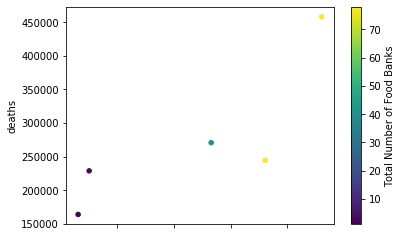

In [769]:
ax2 = num_of_food_banks_per_capita.plot.scatter(x='cases',
                      y='deaths',
                      c='Total Number of Food Banks',
                      colormap='viridis')


In [770]:
foodbanks["FY2019_Lbs"] = foodbanks["FY2019_Lbs"].str.replace(",","").astype(float)
foodbanks["F12mo_Lbs"] = foodbanks["F12mo_Lbs"].str.replace(",","").astype(float)

In [771]:
pop_boston = pd.read_csv("./data/Boston/Population-Estimates-by-County.csv", skiprows=1)
print(pop_boston.columns)
print(pop_boston.info())
# countypop =countypop.dropna()
# countypop=countypop.drop(columns=[2018, 'Number', 'Percent', 'Number.1', 'Percent.1'])
# countypop=countypop.rename(columns={"Unnamed: 0": "Geography"})
# pop_boston=pop_boston[pop_boston[count]]
pop_boston.head()

Index(['County', 'Population'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
County        15 non-null object
Population    14 non-null object
dtypes: object(2)
memory usage: 320.0+ bytes
None


,County,Population
0,Barnstable County,"212,990"
1,Berkshire County,"124,944"
2,Bristol County,"565,217"
3,Dukes County,"17,332"
4,Essex County,"789,034"


In [772]:
pop_boston = pop_boston[pop_boston['County'].str.contains('Suffolk') | pop_boston['County'].str.contains('Plymouth') | pop_boston['County'].str.contains('Norfolk') | pop_boston['County'].str.contains('Middlesex') | pop_boston['County'].str.contains('Essex')] 
pop_boston=pop_boston.reset_index()


In [773]:
pop_boston=pop_boston.drop(columns=['index'])
pop_boston

,County,Population
0,Essex County,"789,034"
1,Middlesex County,"1,611,699"
2,Norfolk County,"706,775"
3,Plymouth County,"521,202"
4,Suffolk County,"803,907"


In [774]:
# pop_boston.replace({'County': ''})
pop_boston=pop_boston.replace({'County': {'Essex County': 'Essex', 'Middlesex County': 'Middlesex', 'Norfolk County': 'Norfolk', 'Plymouth County': 'Plymouth',  'Suffolk County': 'Suffolk'}})


In [775]:
pop_boston= pop_boston.sort_values(by='County', ascending=False)
# pop_boston=pop_boston.reset_index('County')
dictionary=pop_boston.set_index('County')['Population'].to_dict()


In [776]:
foodbanks['Pop density']=""

In [777]:
dictionary['Essex']

'789,034'

In [778]:
for index, row in foodbanks.iterrows():
#     print(row['County'])
    foodbanks.set_value(index, 'Pop density', dictionary[row['County']])

/Users/chrisachuu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [779]:
foodbanks["Pop density"] = foodbanks["Pop density"].str.replace(",","").astype(float)

In [829]:
foodbanks["Pop density"].unique()

array([ 789034., 1611699.,  706775.,  521202.,  803907.])

In [833]:
max_amount = float(foodbanks['Pop density'].max())
folium_hmap = folium.Map(location=[42.363015,-71.093333],
                        zoom_start=10,
                        tiles="OpenStreetMap")
# folium_hmap

In [834]:
hm_wide = plugins.HeatMap( list(zip(foodbanks['latitude'], foodbanks['longitude'], foodbanks['Pop density'])),
                   min_opacity=0.5,
                   max_val=max_amount,
                   radius=8, blur=6, 
                   max_zoom=25, 
                 )
plugins.FastMarkerCluster(data=list(zip(foodbanks['latitude'].values, foodbanks['longitude'].values))).add_to(folium_hmap)
# folium.LayerControl().add_to(folium_hmap)
folium_hmap.add_child(hm_wide)

### United States COVID State

In [29]:
# Load relevant packages
import pandas as pd

In [30]:
#Importing Population Density Data 
pop_density_df = pd.read_csv("./data/pop_density_by_state_census_formatted.csv")
print(pop_density_df.columns)
print(pop_density_df.info())
pop_density_df.head()

Index(['STATE_OR_REGION', '1910_POPULATION', '1920_POPULATION',
       '1930_POPULATION', '1940_POPULATION', '1950_POPULATION',
       '1960_POPULATION', '1970_POPULATION', '1980_POPULATION',
       '1990_POPULATION', '2000_POPULATION', '2010_POPULATION', '1910_DENSITY',
       '1920_DENSITY', '1930_DENSITY', '1940_DENSITY', '1950_DENSITY',
       '1960_DENSITY', '1970_DENSITY', '1980_DENSITY', '1990_DENSITY',
       '2000_DENSITY', '2010_DENSITY', '1910_RANK', '1920_RANK', '1930_RANK',
       '1940_RANK', '1950_RANK', '1960_RANK', '1970_RANK', '1980_RANK',
       '1990_RANK', '2000_RANK', '2010_RANK'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 34 columns):
STATE_OR_REGION    53 non-null object
1910_POPULATION    53 non-null int64
1920_POPULATION    53 non-null int64
1930_POPULATION    53 non-null int64
1940_POPULATION    53 non-null int64
1950_POPULATION    53 non-null int64
1960_POPULATION    53 non-null int64
1970

,STATE_OR_REGION,1910_POPULATION,1920_POPULATION,1930_POPULATION,1940_POPULATION,1950_POPULATION,1960_POPULATION,1970_POPULATION,1980_POPULATION,1990_POPULATION,...,1920_RANK,1930_RANK,1940_RANK,1950_RANK,1960_RANK,1970_RANK,1980_RANK,1990_RANK,2000_RANK,2010_RANK
0,United States,92228531,106021568,123202660,132165129,151325798,179323175,203211926,226545805,248709873,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,2138093,2348174,2646248,2832961,3061743,3266740,3444165,3893888,4040587,...,25.0,24.0,23.0,24.0,28.0,28.0,28.0,27.0,28.0,29.0
2,Alaska,64356,55036,59278,72524,128643,226167,300382,401851,550043,...,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0
3,Arizona,204354,334162,435573,499261,749587,1302161,1770900,2718215,3665228,...,49.0,47.0,47.0,47.0,43.0,43.0,42.0,39.0,38.0,35.0
4,Arkansas,1574449,1752204,1854482,1949387,1909511,1786272,1923295,2286435,2350725,...,31.0,32.0,32.0,34.0,36.0,37.0,37.0,37.0,36.0,36.0


In [31]:
df_pop_main = pop_density_df[['STATE_OR_REGION','2010_POPULATION','2010_DENSITY','2010_RANK']]
df_pop_main.head()

,STATE_OR_REGION,2010_POPULATION,2010_DENSITY,2010_RANK
0,United States,308745538,87.4,NaN
1,Alabama,4779736,94.4,29.0
2,Alaska,710231,1.2,52.0
3,Arizona,6392017,56.3,35.0
4,Arkansas,2915918,56,36.0


In [32]:
df_pop_main.sort_values(by='2010_RANK', ascending=True)

,STATE_OR_REGION,2010_POPULATION,2010_DENSITY,2010_RANK
9,District of Columbia,601723,"9,856.50",1.0
31,New Jersey,8791894,"1,195.50",2.0
52,Puerto Rico,3725789,"1,088.20",3.0
40,Rhode Island,1052567,"1,018.10",4.0
22,Massachusetts,6547629,839.4,5.0
7,Connecticut,3574097,738.1,6.0
21,Maryland,5773552,594.8,7.0
8,Delaware,897934,460.8,8.0
33,New York,19378102,411.2,9.0
10,Florida,18801310,350.6,10.0


In [96]:
us_case_death_df = pd.read_csv("./data/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv")
print(us_case_death_df.columns)
print(us_case_death_df.info())
us_case_death_df.head()

Index(['submission_date', 'state', 'tot_cases', 'conf_cases', 'prob_cases',
       'new_case', 'pnew_case', 'tot_death', 'conf_death', 'prob_death',
       'new_death', 'pnew_death', 'created_at', 'consent_cases',
       'consent_deaths'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18822 entries, 0 to 18821
Data columns (total 15 columns):
submission_date    18822 non-null object
state              18822 non-null object
tot_cases          18822 non-null int64
conf_cases         7347 non-null float64
prob_cases         7347 non-null float64
new_case           18822 non-null int64
pnew_case          13702 non-null float64
tot_death          18822 non-null int64
conf_death         7748 non-null float64
prob_death         7748 non-null float64
new_death          18822 non-null int64
pnew_death         13611 non-null float64
created_at         18822 non-null object
consent_cases      15368 non-null object
consent_deaths     15682 non-null object
dtypes: float64(

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,01/22/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
1,01/23/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
2,01/24/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
3,01/25/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
4,01/26/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree


In [97]:
df_uscase_main = us_case_death_df[['submission_date','state','tot_cases','tot_death']]
df_uscase_main.head()

,submission_date,state,tot_cases,tot_death
0,01/22/2020,CO,0,0
1,01/23/2020,CO,0,0
2,01/24/2020,CO,0,0
3,01/25/2020,CO,0,0
4,01/26/2020,CO,0,0


In [98]:
#Separate Dataset by State 
Alabama_df = us_case_death_df.loc[us_case_death_df['state'] == 'AL']
Alaska_df = us_case_death_df.loc[us_case_death_df['state'] == 'AK']
Arizona_df = us_case_death_df.loc[us_case_death_df['state'] == 'AZ']
Arkansas_df = us_case_death_df.loc[us_case_death_df['state'] == 'AR']
California_df = us_case_death_df.loc[us_case_death_df['state'] == 'CA']

Colorado_df = us_case_death_df.loc[us_case_death_df['state'] == 'CO']
Connecticut_df = us_case_death_df.loc[us_case_death_df['state'] == 'CT']
Delaware_df = us_case_death_df.loc[us_case_death_df['state'] == 'DE']
DC_df = us_case_death_df.loc[us_case_death_df['state'] == 'DC']
Florida_df = us_case_death_df.loc[us_case_death_df['state'] == 'FL']

Georgia_df = us_case_death_df.loc[us_case_death_df['state'] == 'GA']
Hawaii_df = us_case_death_df.loc[us_case_death_df['state'] == 'HI']
Idaho_df = us_case_death_df.loc[us_case_death_df['state'] == 'ID']
Illinois_df = us_case_death_df.loc[us_case_death_df['state'] == 'IL']
Indiana_df = us_case_death_df.loc[us_case_death_df['state'] == 'IN']

Iowa_df = us_case_death_df.loc[us_case_death_df['state'] == 'IA']
Kansas_df = us_case_death_df.loc[us_case_death_df['state'] == 'KS']
Kentucky_df = us_case_death_df.loc[us_case_death_df['state'] == 'KY']
Louisiana_df = us_case_death_df.loc[us_case_death_df['state'] == 'LA']
Maine_df = us_case_death_df.loc[us_case_death_df['state'] == 'ME']

Maryland_df = us_case_death_df.loc[us_case_death_df['state'] == 'MD']
Massachusetts_df = us_case_death_df.loc[us_case_death_df['state'] == 'MA']
Michigan_df = us_case_death_df.loc[us_case_death_df['state'] == 'MI']
Minnesota_df = us_case_death_df.loc[us_case_death_df['state'] == 'MN']
Mississippi_df = us_case_death_df.loc[us_case_death_df['state'] == 'MS']

Missouri_df = us_case_death_df.loc[us_case_death_df['state'] == 'MO']
Montana_df = us_case_death_df.loc[us_case_death_df['state'] == 'MT']
Nebraska_df = us_case_death_df.loc[us_case_death_df['state'] == 'NE']
Neveda_df = us_case_death_df.loc[us_case_death_df['state'] == 'NV']
New_Hampshire_df = us_case_death_df.loc[us_case_death_df['state'] == 'NH']


New_Jersey_df = us_case_death_df.loc[us_case_death_df['state'] == 'NJ']
New_Mexico_df = us_case_death_df.loc[us_case_death_df['state'] == 'NM']
New_York_df = us_case_death_df.loc[us_case_death_df['state'] == 'NY']
North_Carolina_df = us_case_death_df.loc[us_case_death_df['state'] == 'NC']
North_Dakota_df = us_case_death_df.loc[us_case_death_df['state'] == 'ND']

Ohio_df = us_case_death_df.loc[us_case_death_df['state'] == 'OH']
Oklahoma_df = us_case_death_df.loc[us_case_death_df['state'] == 'OK']
Oregon_df = us_case_death_df.loc[us_case_death_df['state'] == 'OR']
Pennsylvania_df = us_case_death_df.loc[us_case_death_df['state'] == 'PA']
Rhode_Island_df = us_case_death_df.loc[us_case_death_df['state'] == 'RI']

South_Carolina_df = us_case_death_df.loc[us_case_death_df['state'] == 'SC']
South_Dakota_df = us_case_death_df.loc[us_case_death_df['state'] == 'SD']
Tennessee_df = us_case_death_df.loc[us_case_death_df['state'] == 'TN']
Texas_df = us_case_death_df.loc[us_case_death_df['state'] == 'TX']
Utah_df = us_case_death_df.loc[us_case_death_df['state'] == 'UT']

Vermont_df = us_case_death_df.loc[us_case_death_df['state'] == 'VT']
Virginia_df = us_case_death_df.loc[us_case_death_df['state'] == 'VA']
Washington_df = us_case_death_df.loc[us_case_death_df['state'] == 'WA']
West_Virginia_df = us_case_death_df.loc[us_case_death_df['state'] == 'WV']
Wisconsin_df = us_case_death_df.loc[us_case_death_df['state'] == 'WI']
Wyoming_df = us_case_death_df.loc[us_case_death_df['state'] == 'WY']


Puerto_Rico_df = us_case_death_df.loc[us_case_death_df['state'] == 'PR']
Guam_df = us_case_death_df.loc[us_case_death_df['state'] == 'GU']



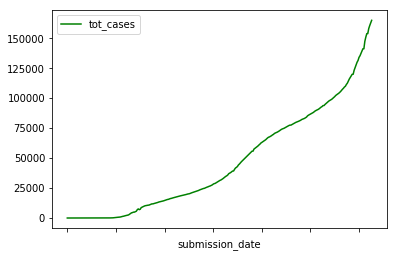

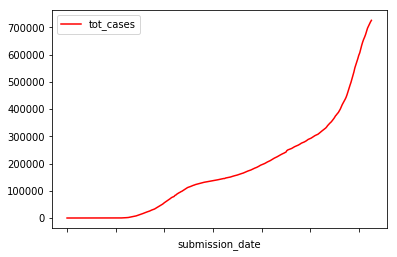

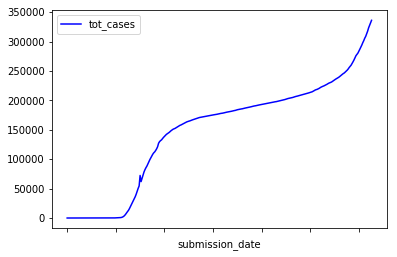

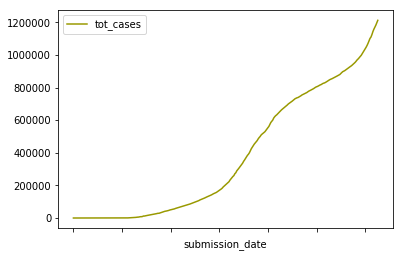

In [99]:
import matplotlib.pyplot as plt
import numpy as np
#Sample of Graphing Cases by State over Time
Washington_df.plot.line(x="submission_date",y = "tot_cases",color = 'green')
Illinois_df.plot.line(x="submission_date",y = "tot_cases", color = 'red')
New_York_df.plot.line(x="submission_date",y = "tot_cases", color = 'blue') 
California_df.plot.line(x="submission_date",y = "tot_cases", color = '#999900') 

# Linear Regression Model: County Data

In [29]:
county_covid2 = pd.read_csv("./data/us-counties.csv")
print(county_covid2.columns)
print(county_covid2.info())
county_covid2.head(2)

Index(['date', 'county', 'state', 'fips', 'cases', 'deaths'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823155 entries, 0 to 823154
Data columns (total 6 columns):
date      823155 non-null object
county    823155 non-null object
state     823155 non-null object
fips      815368 non-null float64
cases     823155 non-null int64
deaths    805876 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 37.7+ MB
None


,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0


In [30]:
county_covid2.tail()

,date,county,state,fips,cases,deaths
823150,2020-12-12,Sweetwater,Wyoming,56037.0,2384,14.0
823151,2020-12-12,Teton,Wyoming,56039.0,1886,2.0
823152,2020-12-12,Uinta,Wyoming,56041.0,1289,7.0
823153,2020-12-12,Washakie,Wyoming,56043.0,628,11.0
823154,2020-12-12,Weston,Wyoming,56045.0,428,2.0


In [31]:
county_covid2=county_covid2[county_covid2['date'].str.contains('2020-12-12')] 
county_covid2.head()

,date,county,state,fips,cases,deaths
819909,2020-12-12,Autauga,Alabama,1001.0,3258,41.0
819910,2020-12-12,Baldwin,Alabama,1003.0,10665,141.0
819911,2020-12-12,Barbour,Alabama,1005.0,1269,30.0
819912,2020-12-12,Bibb,Alabama,1007.0,1417,40.0
819913,2020-12-12,Blount,Alabama,1009.0,3744,47.0


In [32]:
# Specifying for state of Massachusetts
# covid_mass = county_covid2.query("state == 'Massachusetts'")
# covid_mass.head(2)

In [33]:
# Massachussetts less certain counties, ask Christina?
# mask = covid_mass['county'].isin(['Berkshire','Worcester', 'Barnstable', 'Bristol', 'Hampden', 'Unknown', 'Franklin', 'Hampshire', 'Nantucket', 'Dukes'])
# covid_mass_2 = covid_mass[~mask]
# covid_mass_2.head(2)

In [34]:
# county_covid2['county'].unique()

In [35]:
# grouping by county year 2020
# county_covid_3 = county_covid2.groupby(['county']).sum().reset_index()
# county_covid_3.head(2)

In [36]:
# Creating copy of county food insecurity datframe
food_insec_2020_county2_copy = food_insec_2020_county2.copy()
food_insec_2020_county2_copy.head(2)

,"County, State",FIPS,State,Total Population,2018 Food Insecurity %,2018 Food Insecurity #,Proj_2020 Food Insecurity %,Proj_2020 Food Insecurity #,Proj_2020 Food Insecurity % change,Proj_2020 Food Insecurity # change,2020 Adjusted Annual Unemployment Change
0,"autauga county, alabama",1001,AL,55200,0.156,8620,0.186,10240,19,1620,0.043
1,"baldwin county, alabama",1003,AL,208107,0.129,26860,0.163,33970,26,7110,0.053


In [37]:
# Cleaning 'County, State' column from food insec dataframe for easier merging with covid deaths dataframe 
food_insec_2020_county2_copy['County, State'] = food_insec_2020_county2_copy['County, State'].str.split(",", expand=True)[0]
food_insec_2020_county2_copy['County, State'] = food_insec_2020_county2_copy['County, State'].str.replace(' county', '')
food_insec_2020_county2_copy = food_insec_2020_county2_copy.rename(columns={'County, State':'county'})
food_insec_2020_county2_copy.head(2)  

,county,FIPS,State,Total Population,2018 Food Insecurity %,2018 Food Insecurity #,Proj_2020 Food Insecurity %,Proj_2020 Food Insecurity #,Proj_2020 Food Insecurity % change,Proj_2020 Food Insecurity # change,2020 Adjusted Annual Unemployment Change
0,autauga,1001,AL,55200,0.156,8620,0.186,10240,19,1620,0.043
1,baldwin,1003,AL,208107,0.129,26860,0.163,33970,26,7110,0.053


In [38]:
# Capitalizing first letter in 'county' column
food_insec_2020_county2_copy['county'] = food_insec_2020_county2_copy['county'].str.capitalize()
food_insec_2020_county2_copy.head(2)

,county,FIPS,State,Total Population,2018 Food Insecurity %,2018 Food Insecurity #,Proj_2020 Food Insecurity %,Proj_2020 Food Insecurity #,Proj_2020 Food Insecurity % change,Proj_2020 Food Insecurity # change,2020 Adjusted Annual Unemployment Change
0,Autauga,1001,AL,55200,0.156,8620,0.186,10240,19,1620,0.043
1,Baldwin,1003,AL,208107,0.129,26860,0.163,33970,26,7110,0.053


In [39]:
# test2 = food_insec_2020_county2_copy.query("county == 'Middlesex'")
# test2

In [40]:
us_state_abbrev = {
'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO',
'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'}

In [41]:
county_covid2['state'] = county_covid2['state'].map(us_state_abbrev).fillna(county_covid2['state'])
county_covid2.head()

,date,county,state,fips,cases,deaths
819909,2020-12-12,Autauga,AL,1001.0,3258,41.0
819910,2020-12-12,Baldwin,AL,1003.0,10665,141.0
819911,2020-12-12,Barbour,AL,1005.0,1269,30.0
819912,2020-12-12,Bibb,AL,1007.0,1417,40.0
819913,2020-12-12,Blount,AL,1009.0,3744,47.0


In [42]:
county_covid2=county_covid2.rename(columns={"state": "State"})
county_covid2.head()

,date,county,State,fips,cases,deaths
819909,2020-12-12,Autauga,AL,1001.0,3258,41.0
819910,2020-12-12,Baldwin,AL,1003.0,10665,141.0
819911,2020-12-12,Barbour,AL,1005.0,1269,30.0
819912,2020-12-12,Bibb,AL,1007.0,1417,40.0
819913,2020-12-12,Blount,AL,1009.0,3744,47.0


In [43]:
# Merging Covid Massachusetts county Cases dataframe with Food Insecurity Dataframe
county_FI_covid2 = pd.merge(county_covid2, food_insec_2020_county2_copy, how='inner', left_on=['county', 'State'], right_on=['county', 'State'])
county_FI_covid2.head(2)

,date,county,State,fips,cases,deaths,FIPS,Total Population,2018 Food Insecurity %,2018 Food Insecurity #,Proj_2020 Food Insecurity %,Proj_2020 Food Insecurity #,Proj_2020 Food Insecurity % change,Proj_2020 Food Insecurity # change,2020 Adjusted Annual Unemployment Change
0,2020-12-12,Autauga,AL,1001.0,3258,41.0,1001,55200,0.156,8620,0.186,10240,19,1620,0.043
1,2020-12-12,Baldwin,AL,1003.0,10665,141.0,1003,208107,0.129,26860,0.163,33970,26,7110,0.053


In [44]:
county_FI_covid2['Death Rate']= county_FI_covid2['deaths']/county_FI_covid2['Total Population']
county_FI_covid2['Cases Rate']= county_FI_covid2['cases']/county_FI_covid2['Total Population']


In [45]:
county_FI_covid2.loc[(county_FI_covid2['county'] == 'King') & (county_FI_covid2['State'] == 'TX')]


,date,county,State,fips,cases,deaths,FIPS,Total Population,2018 Food Insecurity %,2018 Food Insecurity #,Proj_2020 Food Insecurity %,Proj_2020 Food Insecurity #,Proj_2020 Food Insecurity % change,Proj_2020 Food Insecurity # change,2020 Adjusted Annual Unemployment Change,Death Rate,Cases Rate
2389,2020-12-12,King,TX,48269.0,5,0.0,48269,228,0.147,30,0.161,30,9,0,0.011,0.0,0.02193


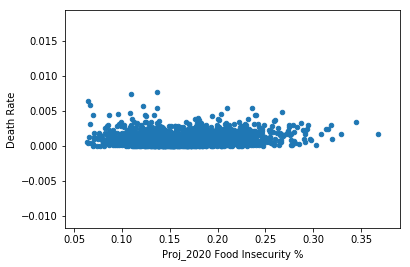

In [46]:
county_FI_covid2.plot.scatter(x='Proj_2020 Food Insecurity %',
                      y='Death Rate')

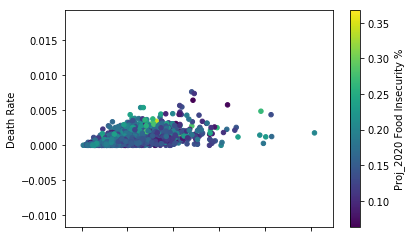

In [47]:
county_FI_covid2.plot.scatter(x='Cases Rate',
                      y='Death Rate', c='Proj_2020 Food Insecurity %',
                      colormap='viridis')

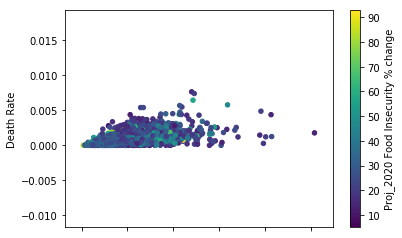

In [48]:
county_FI_covid2.plot.scatter(x='Cases Rate',
                      y='Death Rate', c='Proj_2020 Food Insecurity % change',
                      colormap='viridis')

In [49]:
sns.regplot(x="Death Rate", y="Proj_2020 Food Insecurity % change", data=county_FI_covid2);


NameError: name 'sns' is not defined

In [ ]:
sns.regplot(y="Death Rate", x="Proj_2020 Food Insecurity % change", data=county_FI_covid2);


In [50]:
# column = county_FI_covid2["Death Rate"]
# max_index = column.idxmax()
# print(max_index)


In [51]:
# print(county_FI_covid.loc[[14087]])

In [52]:
# Munging Dataframe for use in Linear Regression Model
county_FI_covid_2  = county_FI_covid2[['Death Rate','Proj_2020 Food Insecurity %']]
county_FI_covid_2 = county_FI_covid_2.rename(columns={'Proj_2020 Food Insecurity %':'Food_Insec_Rate_2020'})
county_FI_covid_2.head()

,Death Rate,Food_Insec_Rate_2020
0,0.000743,0.186
1,0.000678,0.163
2,0.001164,0.251
3,0.001776,0.189
4,0.000815,0.161


In [53]:
# x1 = mass_FI_covid2.deaths.values
# x1.shape

In [54]:
# Reshaping dt, Sklearn requires a two-dimensional array of values
y = county_FI_covid_2['Death Rate'].values.reshape(-1, 1)
X = county_FI_covid_2.Food_Insec_Rate_2020.values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)
X

Shape:  (2828, 1) (2828, 1)


array([[ 0.186],
       [ 0.163],
       [ 0.251],
       ..., 
       [ 0.166],
       [ 0.152],
       [ 0.161]])

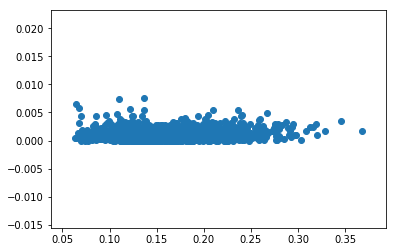

In [55]:
# Plotting the data
plt.scatter(X, y)

In [56]:
# Creating the model
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X, y)

In [57]:
# Printing the coefficient and the intercept for the model
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[ 0.00225173]]
y-axis intercept:  [ 0.00057491]


In [58]:
# transforming min and max values to be in format array([[]])
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[ 0.063]]
Max X Value: [[ 0.368]]


In [59]:
# Calculate the y_min and y_max using model.predict and x_min and x_max
y_min = model.predict(x_min)
y_max = model.predict(x_max)

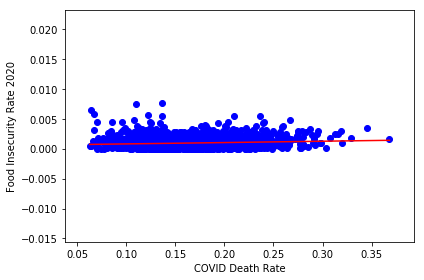

In [60]:
# Plotting X and y using plt.scatter
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.xlabel('COVID Death Rate')
plt.ylabel('Food Insecurity Rate 2020')
plt.tight_layout()
plt.savefig('linear_regression_covid.png')

Our linear regression model did not turn out as we hypothesized: we thought that there would be a linear relationship between high covid deaths and high food insecurity rates. Since our linear regression model did not turn out as we thought, we will be exploring different models in the future. We decided we need more factors for our models, such as unemployment, socioeconomic impact, and etc.

In [61]:
# county_FI_covid
# county_FI_covid.plot.scatter(x='Proj_2020 Food Insecurity %',
#                       y='deaths')


In [62]:
pop_estimates = pd.read_excel("./data/PopulationEstimates.xls", skiprows=2)
print(pop_estimates.columns)
print(pop_estimates.info())
pop_estimates.head()

Index(['FIPStxt', 'State', 'Area_Name', 'Rural-urban_Continuum Code_2003',
       'Rural-urban_Continuum Code_2013', 'Urban_Influence_Code_2003',
       'Urban_Influence_Code_2013', 'Economic_typology_2015',
       'CENSUS_2010_POP', 'ESTIMATES_BASE_2010',
       ...
       'R_DOMESTIC_MIG_2019', 'R_NET_MIG_2011', 'R_NET_MIG_2012',
       'R_NET_MIG_2013', 'R_NET_MIG_2014', 'R_NET_MIG_2015', 'R_NET_MIG_2016',
       'R_NET_MIG_2017', 'R_NET_MIG_2018', 'R_NET_MIG_2019'],
      dtype='object', length=165)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3273 entries, 0 to 3272
Columns: 165 entries, FIPStxt to R_NET_MIG_2019
dtypes: float64(150), int64(13), object(2)
memory usage: 4.1+ MB
None


,FIPStxt,State,Area_Name,Rural-urban_Continuum Code_2003,Rural-urban_Continuum Code_2013,Urban_Influence_Code_2003,Urban_Influence_Code_2013,Economic_typology_2015,CENSUS_2010_POP,ESTIMATES_BASE_2010,...,R_DOMESTIC_MIG_2019,R_NET_MIG_2011,R_NET_MIG_2012,R_NET_MIG_2013,R_NET_MIG_2014,R_NET_MIG_2015,R_NET_MIG_2016,R_NET_MIG_2017,R_NET_MIG_2018,R_NET_MIG_2019
0,0,US,United States,NaN,NaN,NaN,NaN,NaN,308745538,308758105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000,AL,Alabama,NaN,NaN,NaN,NaN,NaN,4779736,4780125,...,1.917501,0.578434,1.186314,1.522549,0.563489,0.626357,0.745172,1.090366,1.773786,2.483744
2,1001,AL,Autauga County,2.0,2.0,2.0,2.0,0.0,54571,54597,...,4.847310,6.018182,-6.226119,-3.902226,1.970443,-1.712875,4.777171,0.849656,0.540916,4.560062
3,1003,AL,Baldwin County,4.0,3.0,5.0,2.0,5.0,182265,182265,...,24.017829,16.641870,17.488579,22.751474,20.184334,17.725964,21.279291,22.398256,24.727215,24.380567
4,1005,AL,Barbour County,6.0,6.0,6.0,6.0,3.0,27457,27455,...,-5.690302,0.292676,-6.897817,-8.132185,-5.140431,-15.724575,-18.238016,-24.998528,-8.754922,-5.165664


In [63]:
pop_estimates = pop_estimates[pop_estimates['Area_Name'].str.contains('County')] 
pop_estimates.head()

,FIPStxt,State,Area_Name,Rural-urban_Continuum Code_2003,Rural-urban_Continuum Code_2013,Urban_Influence_Code_2003,Urban_Influence_Code_2013,Economic_typology_2015,CENSUS_2010_POP,ESTIMATES_BASE_2010,...,R_DOMESTIC_MIG_2019,R_NET_MIG_2011,R_NET_MIG_2012,R_NET_MIG_2013,R_NET_MIG_2014,R_NET_MIG_2015,R_NET_MIG_2016,R_NET_MIG_2017,R_NET_MIG_2018,R_NET_MIG_2019
2,1001,AL,Autauga County,2.0,2.0,2.0,2.0,0.0,54571,54597,...,4.847310,6.018182,-6.226119,-3.902226,1.970443,-1.712875,4.777171,0.849656,0.540916,4.560062
3,1003,AL,Baldwin County,4.0,3.0,5.0,2.0,5.0,182265,182265,...,24.017829,16.641870,17.488579,22.751474,20.184334,17.725964,21.279291,22.398256,24.727215,24.380567
4,1005,AL,Barbour County,6.0,6.0,6.0,6.0,3.0,27457,27455,...,-5.690302,0.292676,-6.897817,-8.132185,-5.140431,-15.724575,-18.238016,-24.998528,-8.754922,-5.165664
5,1007,AL,Bibb County,1.0,1.0,1.0,1.0,0.0,22915,22915,...,1.385134,-4.998356,-3.787545,-5.797999,1.331144,1.329817,-0.708717,-3.234669,-6.857092,1.831952
6,1009,AL,Blount County,1.0,1.0,1.0,1.0,0.0,57322,57322,...,1.020788,0.208812,-1.650165,-0.347225,-2.049590,-1.338525,-1.391062,6.193562,-0.069229,1.124597


In [64]:
pop_estimates = pop_estimates[["FIPStxt", "State", "Area_Name", "POP_ESTIMATE_2019"]]

In [65]:
pop_estimates["Area_Name"] = pop_estimates["Area_Name"].str.replace(" County","")
pop_estimates.head()

,FIPStxt,State,Area_Name,POP_ESTIMATE_2019
2,1001,AL,Autauga,55869
3,1003,AL,Baldwin,223234
4,1005,AL,Barbour,24686
5,1007,AL,Bibb,22394
6,1009,AL,Blount,57826


In [66]:
pop_estimates=pop_estimates.rename(columns={"FIPStxt": "FIPS", "Area_Name": "county"})
pop_estimates.head()

,FIPS,State,county,POP_ESTIMATE_2019
2,1001,AL,Autauga,55869
3,1003,AL,Baldwin,223234
4,1005,AL,Barbour,24686
5,1007,AL,Bibb,22394
6,1009,AL,Blount,57826


In [67]:
# county_FI_covid2.head()

In [68]:
# county_FI_covid.head()

In [69]:
# county_FI_covid3 = pd.merge(county_FI_covid, pop_estimates, how='inner', left_on=['county', 'State'], right_on=['county', 'State'])
# county_FI_covid3.head()

In [70]:
# county_FI_covid['Death Rate']= county_FI_covid['deaths']/county_FI_covid['Total Population']
# county_FI_covid['Cases Rate']= county_FI_covid['cases']/county_FI_covid['Total Population']



In [71]:
# county_FI_covid.head()

In [72]:
# county_FI_covid.plot.scatter(x='Proj_2020 Food Insecurity %',
#                       y='Death Rate')

In [73]:
# column = county_FI_covid["Death Rate"]
# max_index = column.idxmax()
# print(max_index)


In [74]:
# print(county_FI_covid.loc[[14087]])


# Extra Features

### DATASETS: 
* Rural-Urban Continuum Codes
    * ruralurbancodes2013.xls - https://www.ers.usda.gov/data-products/rural-urban-continuum-codes.aspx
    * U.S. DEPARTMENT OF AGRICULTURE - Economic Research Service -USDA
* County-level Data Sets 
    * county_data.xlsx -- https://www.ers.usda.gov/data-products/county-level-data-sets/download-data/
    * U.S. DEPARTMENT OF AGRICULTURE - Economic Research Service -USDA
* County-Covid Deaths
    * us-counties.csv" - https://github.com/nytimes/covid-19-data#geographic-exceptions
    * New York Times Github - Coronavirus (Covid-19) Data in the United States

In [75]:
# Reading xlsx file
# https://stackoverflow.com/questions/16888888/how-to-read-a-xlsx-file-using-the-pandas-library-in-ipython
rural_urban_code = pd.read_excel('./data/ruralurbancodes2013.xls', sheet_name= 'Rural-urban Continuum Code 2013')
county_data = pd.read_excel('./data/county_data.xlsx', sheet_name= 'County_Data')
rural_urban_code.head(2)

,FIPS,State,County_Name,Population_2010,RUCC_2013,Description
0,1001,AL,Autauga County,54571,2.0,"Metro - Counties in metro areas of 250,000 to ..."
1,1003,AL,Baldwin County,182265,3.0,Metro - Counties in metro areas of fewer than ...


In [76]:
county_data2 = pd.merge(county_data, rural_urban_code, how='inner', left_on='FIPS Code', right_on='FIPS')
county_data2.head(2)

,FIPS Code,State_x,Area_name,Unemployment_rate_2019,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019,POVALL_2019,PCTPOV017_2019,MEDHHINC_2019,"Less than a high school diploma, 2014-18",...,"Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults completing some college or associate's degree, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18",FIPS,State_y,County_Name,Population_2010,RUCC_2013,Description
0,1001,AL,Autauga County,2.7,58233,112.481888,6723,15.9,58233,4204,...,11.3,32.6,28.4,27.7,1001,AL,Autauga County,54571,2.0,"Metro - Counties in metro areas of 250,000 to ..."
1,1003,AL,Baldwin County,2.7,59871,115.645828,22360,13.5,59871,14310,...,9.7,27.6,31.3,31.3,1003,AL,Baldwin County,182265,3.0,Metro - Counties in metro areas of fewer than ...


In [77]:
# POVALL_2019: Estimate of people of all ages in poverty 2019,  
# PCTPOVALL_2019: Estimated percent of people of all ages in poverty 2019,  
# MEDHHINC_2019: Estimate of median household income 2019
print(county_data2.columns.values.tolist())
county_data2.shape

['FIPS Code', 'State_x', 'Area_name', 'Unemployment_rate_2019', 'Median_Household_Income_2019', 'Med_HH_Income_Percent_of_State_Total_2019', 'POVALL_2019', 'PCTPOV017_2019', 'MEDHHINC_2019', 'Less than a high school diploma, 2014-18', 'High school diploma only, 2014-18', "Some college or associate's degree, 2014-18", "Bachelor's degree or higher, 2014-18", 'Percent of adults with less than a high school diploma, 2014-18', 'Percent of adults with a high school diploma only, 2014-18', "Percent of adults completing some college or associate's degree, 2014-18", "Percent of adults with a bachelor's degree or higher, 2014-18", 'FIPS', 'State_y', 'County_Name', 'Population_2010', 'RUCC_2013', 'Description']


(3139, 23)

In [78]:
county_data3= county_data2.drop(columns=['Median_Household_Income_2019','POVALL_2019','MEDHHINC_2019', 'Less than a high school diploma, 2014-18',
                                        'High school diploma only, 2014-18', "Some college or associate's degree, 2014-18",
                                        "Bachelor's degree or higher, 2014-18","Bachelor's degree or higher, 2014-18",
                                        'FIPS', 'State_y', 'County_Name','Description'])
county_data3.rename(columns={'PCTPOV017_2019':'PovertyRate_2019', 'Area_name':'County',
                                           'State_x':'Sate', 'FIPS Code':'FIPS'}, inplace=True)
county_data3.head(1)

,FIPS,Sate,County,Unemployment_rate_2019,Med_HH_Income_Percent_of_State_Total_2019,PovertyRate_2019,"Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults completing some college or associate's degree, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18",Population_2010,RUCC_2013
0,1001,AL,Autauga County,2.7,112.481888,15.9,11.3,32.6,28.4,27.7,54571,2.0


## County_DataFrame
 
### Features:
BY_County
1. Poverty Rate
2. Unemployment Rate
3. Education Rate (which subset to use?)
4. Food Insecurity Rate
5. Covid Deaths
6. Food Banks (certain regions?)

# Creating Dataframe to use for Model 

In [79]:
print(county_FI_covid2.columns.values.tolist())
print(county_FI_covid2.shape)
county_FI_covid2.head(2)

['date', 'county', 'State', 'fips', 'cases', 'deaths', 'FIPS', 'Total Population', '2018 Food Insecurity %', '2018 Food Insecurity #', 'Proj_2020 Food Insecurity %', 'Proj_2020 Food Insecurity #', 'Proj_2020 Food Insecurity % change', 'Proj_2020 Food Insecurity # change', '2020 Adjusted Annual Unemployment Change', 'Death Rate', 'Cases Rate']
(2828, 17)


,date,county,State,fips,cases,deaths,FIPS,Total Population,2018 Food Insecurity %,2018 Food Insecurity #,Proj_2020 Food Insecurity %,Proj_2020 Food Insecurity #,Proj_2020 Food Insecurity % change,Proj_2020 Food Insecurity # change,2020 Adjusted Annual Unemployment Change,Death Rate,Cases Rate
0,2020-12-12,Autauga,AL,1001.0,3258,41.0,1001,55200,0.156,8620,0.186,10240,19,1620,0.043,0.000743,0.059022
1,2020-12-12,Baldwin,AL,1003.0,10665,141.0,1003,208107,0.129,26860,0.163,33970,26,7110,0.053,0.000678,0.051248


In [80]:
county_FI_covid2= county_FI_covid2.drop(columns=['fips','2018 Food Insecurity #','Proj_2020 Food Insecurity # change',
                                                 '2020 Adjusted Annual Unemployment Change' ])
county_FI_covid2.head(1)

,date,county,State,cases,deaths,FIPS,Total Population,2018 Food Insecurity %,Proj_2020 Food Insecurity %,Proj_2020 Food Insecurity #,Proj_2020 Food Insecurity % change,Death Rate,Cases Rate
0,2020-12-12,Autauga,AL,3258,41.0,1001,55200,0.156,0.186,10240,19,0.000743,0.059022


### DATASETS: 
* County Distance Database_20120
    * sf12010countydistance100miles.csv - https://www.nber.org/research/data/county-distance-database
    * National Bureau of Economic Research (NBER)
* Food Bank Locations Dataset_2020 
    * FeedingAmerica_FB.xlsx -- https://www.feedingamerica.org/find-your-local-foodbank
* US Zipcode to County State to FIPS 
    * ZIP-COUNTY-FIPS_2010-03.csv 
    * Data.world - https://www2.census.gov/geo/docs/reference/codes/files/national_county.txt
    * https://data.world/niccolley/us-zipcode-to-county-state/workspace/file?filename=ZIP-COUNTY-FIPS_2014-12.csv
* Food Insecurity Rates Datasets
    * The Impact of Coronavirus on Food Insecurity Update 10.2020.xlsx
    * MMG2020_2018Data_ToShare.xlsx
    * MMG2019_2017Data_ToShare.xlsx
    * Feeding America - Research Department - https://www.feedingamerica.org/research/coronavirus-hunger-research 
    * Datasets from The Impact of Coronavirus on Food Insecurity of Map the Meal Gap (updated October 2020)

In [81]:
# Reading sheet
feedingAmerica_FB = pd.read_excel('./data/FeedingAmerica_FB.xlsx', sheet_name='FeedingAmerica_FoodBank')
feedingAmerica_FB.head(2)

,Name,Street,City
0,"Food Bank of Alaska, Inc.",2121 Spar Avenue,"Anchorage, AK 99501"
1,Fairbanks Community Food Bank,725 26th Ave.,"Fairbanks, AK 99701"


In [83]:
fips_2010 = pd.read_csv("./data/ZIP-COUNTY-FIPS_2010-03.csv")
fips_2010.head(8)

,ZIP,COUNTYNAME,STATE,STCOUNTYFP,CLASSFP
0,36003,Autauga County,AL,1001,H1
1,36006,Autauga County,AL,1001,H1
2,36008,Autauga County,AL,1001,H1
3,36022,Autauga County,AL,1001,H1
4,36051,Autauga County,AL,1001,H1
5,36066,Autauga County,AL,1001,H1
6,36067,Autauga County,AL,1001,H1
7,36091,Autauga County,AL,1001,H1


In [84]:
print(fips_2010.dtypes)
fips_2010.columns

ZIP            int64
COUNTYNAME    object
STATE         object
STCOUNTYFP     int64
CLASSFP       object
dtype: object


Index(['ZIP', 'COUNTYNAME', 'STATE', 'STCOUNTYFP', 'CLASSFP'], dtype='object')

In [85]:
duplicateRowsDF1 = fips_2010[fips_2010.duplicated(['STCOUNTYFP'])]
# duplicateRowsDF['STCOUNTYFP'].value_counts()
# duplicateRowsDF1

In [86]:
abcde = fips_2010['STCOUNTYFP'].value_counts().reset_index()
# abcde1 = abcde.head(50)
abcde.head()

,index,STCOUNTYFP
0,6037,360
1,17031,209
2,11001,190
3,48201,147
4,42003,145


In [87]:
#  df= pd.read_csv('Region_count.csv', encoding ='latin1')
dist_county_100m = pd.read_csv('./data/sf12010countydistance100miles.csv', encoding ='latin1')
dist_county_100m.head(2)

,county1,mi_to_county,county2
0,1001,22.462994,1021
1,1001,26.844687,1085


In [88]:
print(feedingAmerica_FB.columns)
feedingAmerica_FB.dtypes

Index(['Name', 'Street', 'City'], dtype='object')


Name      object
Street    object
City      object
dtype: object

In [89]:
# Splitting 'City' column to facilitate merging with 
feedingAmerica_FB[['City2','State']] = feedingAmerica_FB.City.str.split(",",n = 1, expand=True)
feedingAmerica_FB.head(2)

,Name,Street,City,City2,State
0,"Food Bank of Alaska, Inc.",2121 Spar Avenue,"Anchorage, AK 99501",Anchorage,AK 99501
1,Fairbanks Community Food Bank,725 26th Ave.,"Fairbanks, AK 99701",Fairbanks,AK 99701


In [90]:
# df[['First','Last']] = df.Name.str.split(expand=True) 
feedingAmerica_FB[['State_abr','ZIP']] = feedingAmerica_FB.State.str.split(expand=True) 
feedingAmerica_FB.head(2)

,Name,Street,City,City2,State,State_abr,ZIP
0,"Food Bank of Alaska, Inc.",2121 Spar Avenue,"Anchorage, AK 99501",Anchorage,AK 99501,AK,99501
1,Fairbanks Community Food Bank,725 26th Ave.,"Fairbanks, AK 99701",Fairbanks,AK 99701,AK,99701


In [91]:
# df.drop(columns=['A', 'B'], inplace=True)
feedingAmerica_FB.drop(columns=['State', 'City'], inplace=True)

In [92]:
feedingAmerica_FB.head(2)

,Name,Street,City2,State_abr,ZIP
0,"Food Bank of Alaska, Inc.",2121 Spar Avenue,Anchorage,AK,99501
1,Fairbanks Community Food Bank,725 26th Ave.,Fairbanks,AK,99701


In [93]:
# # Splitting 'City' column into three columns to facilitate merging with 
# feedingAmerica_FB[['City2','State','Zip_code']] = feedingAmerica_FB.City.str.split(" ",n = 2, expand=True)
# feedingAmerica_FB.head(2)

In [94]:
# df["a"] = pd.to_numeric(df["a"])
feedingAmerica_FB["ZIP"] = pd.to_numeric(feedingAmerica_FB["ZIP"])

In [95]:
feedingAmerica_FB["ZIP"].dtypes

dtype('int64')

In [96]:
# # Merging Covid Massachusetts county Cases dataframe with Food Insecurity Dataframe
# feedingAmerica_FB1 = pd.merge(feedingAmerica_FB, fips_2010, how='inner', on='ZIP')
# feedingAmerica_FB1.head(2)

In [97]:
feedingAmerica_FB.head(2)

,Name,Street,City2,State_abr,ZIP
0,"Food Bank of Alaska, Inc.",2121 Spar Avenue,Anchorage,AK,99501
1,Fairbanks Community Food Bank,725 26th Ave.,Fairbanks,AK,99701


In [98]:
print(feedingAmerica_FB.shape)
print(feedingAmerica_FB['Name'].value_counts())

(273, 5)
Food for Families                                                2
Community Connection of Northeast Oregon, Inc.                   1
Linn Benton Food Share                                           1
Feeding South Dakota                                             1
North Country Food Bank, Inc.                                    1
Country Neighbor Program, Inc.                                   1
Community Food Warehouse of Mercer County                        1
Feeding America, Kentucky’s Heartland                            1
Community Food Bank of Central Alabama                           1
God's Pantry Food Bank, Inc.                                     1
Great Plains Food Bank                                           1
Fayette County Community Action Food Bank                        1
Feeding Westchester                                              1
Corner Cupboard Food Bank                                        1
FULFILL - (The FoodBank of Monmouth and Ocean Countie

In [99]:
fips_2010.head(1)

,ZIP,COUNTYNAME,STATE,STCOUNTYFP,CLASSFP
0,36003,Autauga County,AL,1001,H1


In [100]:
print(fips_2010.shape)
print(fips_2010['STCOUNTYFP'].value_counts())

(46855, 5)
6037     360
17031    209
11001    190
48201    147
42003    145
4013     142
6059     141
36061    122
6073     118
36103    111
6071     106
25027    102
48113     98
53033     98
25017     95
42129     94
12086     94
42091     88
36029     87
32003     86
26125     86
48439     86
48029     86
9003      83
27053     82
36119     82
36059     80
6065      79
42017     79
1073      76
        ... 
72059      1
72027      1
48105      1
48393      1
30109      1
51640      1
37139      1
51790      1
72151      1
48003      1
72029      1
51690      1
51515      1
51530      1
78020      1
51620      1
56017      1
72115      1
72083      1
72051      1
31071      1
72019      1
72105      1
72073      1
48431      1
72041      1
8079       1
8111       1
48271      1
72039      1
Name: STCOUNTYFP, Length: 3218, dtype: int64


In [101]:
print(fips_2010['COUNTYNAME'].value_counts())

Washington County          542
Jefferson County           499
Montgomery County          421
Franklin County            395
Los Angeles County         360
Jackson County             353
Orange County              332
Monroe County              290
Wayne County               281
Marion County              279
Madison County             267
Lincoln County             265
Fayette County             226
Polk County                222
Cook County                220
Greene County              216
Clark County               215
Warren County              201
Clay County                198
Carroll County             196
Douglas County             194
District of Columbia       190
Lake County                190
Union County               190
Hamilton County            183
Middlesex County           181
Shelby County              176
Johnson County             172
Delaware County            172
Lee County                 168
                          ... 
Toa Alta Municipio           1
Florida 

In [102]:
feedingAmerica_FB.head(10)

,Name,Street,City2,State_abr,ZIP
0,"Food Bank of Alaska, Inc.",2121 Spar Avenue,Anchorage,AK,99501
1,Fairbanks Community Food Bank,725 26th Ave.,Fairbanks,AK,99701
2,Kenai Peninsula Food Bank,33955 Community College Dr,Soldotna,AK,99669
3,Southeast Alaska Food Bank,10020 Crazy Horse Drive,Juneau,AK,99803
4,Community Food Bank of Central Alabama,107 Walter Davis Drive,Birmingham,AL,35209
5,Food Bank of North Alabama,2000 B. Vernon Ave.,Huntsville,AL,35805
6,"Montgomery Area Food Bank, Inc.\n\n",521 Trade Center Street,Montgomery,AL,36108
7,West Alabama Food Bank,3160 McFarland Blvd,Northport,AL,35476
8,Selma Area Food Bank,497 Oak St.,Selma,AL,36701
9,Food Bank of East Alabama,375 Industry Drive,Auburn,AL,36832


In [103]:
feedingAmerica_FB['ZIP'].value_counts()

32254    1
35476    1
50316    1
28302    1
18064    1
97051    1
45202    1
97333    1
84119    1
76307    1
19608    1
80538    1
80027    1
70815    1
46241    1
5641     1
67211    1
22572    1
30344    1
79761    1
71301    1
55428    1
34947    1
43138    1
64129    1
16601    1
42701    1
93309    1
85365    1
97402    1
        ..
31601    1
80239    1
93036    1
61802    1
87401    1
97128    1
98661    1
95076    1
94558    1
36701    1
6492     1
15701    1
32601    1
99669    1
30507    1
60134    1
88101    1
12110    1
76107    1
46410    1
16201    1
33605    1
97603    1
98108    1
63801    1
94520    1
32055    1
95023    1
47404    1
26624    1
Name: ZIP, Length: 273, dtype: int64

In [104]:
fips_2010.head(1)

,ZIP,COUNTYNAME,STATE,STCOUNTYFP,CLASSFP
0,36003,Autauga County,AL,1001,H1


In [105]:
d_fips = fips_2010.drop(columns=['CLASSFP', 'COUNTYNAME', 'STATE'])
d_fips.head(2)

,ZIP,STCOUNTYFP
0,36003,1001
1,36006,1001


In [106]:
# print(feedingAmerica_FB['ZIP'].value_counts())
feedingAmerica_FB.head(2)

,Name,Street,City2,State_abr,ZIP
0,"Food Bank of Alaska, Inc.",2121 Spar Avenue,Anchorage,AK,99501
1,Fairbanks Community Food Bank,725 26th Ave.,Fairbanks,AK,99701


In [205]:
feedingAmerica_FB_df = feedingAmerica_FB[['Name', 'Street', 'City2','State_abr','ZIP']]
feedingAmerica_FB_df.head()

,Name,Street,City2,State_abr,ZIP
0,"Food Bank of Alaska, Inc.",2121 Spar Avenue,Anchorage,AK,99501
1,Fairbanks Community Food Bank,725 26th Ave.,Fairbanks,AK,99701
2,Kenai Peninsula Food Bank,33955 Community College Dr,Soldotna,AK,99669
3,Southeast Alaska Food Bank,10020 Crazy Horse Drive,Juneau,AK,99803
4,Community Food Bank of Central Alabama,107 Walter Davis Drive,Birmingham,AL,35209


In [206]:
f = pd.merge(feedingAmerica_FB_df, d_fips, left_on='ZIP', right_on='ZIP', how='left')
print(f.shape)
f.head(8)

(329, 6)


,Name,Street,City2,State_abr,ZIP,STCOUNTYFP
0,"Food Bank of Alaska, Inc.",2121 Spar Avenue,Anchorage,AK,99501,2020.0
1,Fairbanks Community Food Bank,725 26th Ave.,Fairbanks,AK,99701,2090.0
2,Kenai Peninsula Food Bank,33955 Community College Dr,Soldotna,AK,99669,2122.0
3,Southeast Alaska Food Bank,10020 Crazy Horse Drive,Juneau,AK,99803,NaN
4,Community Food Bank of Central Alabama,107 Walter Davis Drive,Birmingham,AL,35209,1073.0
5,Food Bank of North Alabama,2000 B. Vernon Ave.,Huntsville,AL,35805,1089.0
6,"Montgomery Area Food Bank, Inc.\n\n",521 Trade Center Street,Montgomery,AL,36108,1101.0
7,West Alabama Food Bank,3160 McFarland Blvd,Northport,AL,35476,1125.0


In [207]:
# # df.fillna(0)
# f.fillna(0)

In [208]:
273-258

15

In [209]:
f1 = f[f['STCOUNTYFP'].isna()]
f1

,Name,Street,City2,State_abr,ZIP,STCOUNTYFP
3,Southeast Alaska Food Bank,10020 Crazy Horse Drive,Juneau,AK,99803,NaN
18,River Valley Regional Food Bank,1617 South Zero Street,Ft. Smith,AR,72918,NaN
19,Food Bank of Northeast Arkansas,3414 One Place,Jonesboro,AR,72402,NaN
36,FIND Food Bank,83-775 Citrus Ave,Indio,CA,92202,NaN
85,Food Bank of Northeast Georgia,861 Newton Bridge Road,Athens,GA,30604,NaN
113,Community Harvest Food Bank of Northeast India...,999 East Tillman Road,Fort Wayne,IN,46855,NaN
130,Dare to Care Food Bank,5803 Fern Valley Road,Louisville,KY,40232,NaN
133,Food Bank of Northeast Louisiana,4600 Central Ave,Monroe,LA,71211,NaN
141,Good Shepherd Food Bank,3121 Hotel Road,Auburn,ME,4211,NaN
178,Food Bank of the Albemarle,109 Tidewater Way,Elizabeth City,NC,27906,NaN


In [210]:
zip_list = f1.ZIP.tolist()
# zip_list

In [211]:
# pandas.DataFrame.loc[condition, column_label] = new_value
# df.loc[df.Weight == "155", "Name"] = "John"
f.loc[f.ZIP == 99803, "STCOUNTYFP"] = 2110
f.loc[f.ZIP == 72918, "STCOUNTYFP"] = 5131
f.loc[f.ZIP == 72402, "STCOUNTYFP"] = 5031
f.loc[f.ZIP == 92202, "STCOUNTYFP"] = 6065
f.loc[f.ZIP == 30604, "STCOUNTYFP"] = 13059
f.loc[f.ZIP == 46855, "STCOUNTYFP"] = 18003
f.loc[f.ZIP == 40232, "STCOUNTYFP"] = 21111
f.loc[f.ZIP == 71211, "STCOUNTYFP"] = 22073
f.loc[f.ZIP == 4211,  "STCOUNTYFP"] = 23023
f.loc[f.ZIP == 27906, "STCOUNTYFP"] = 37139
f.loc[f.ZIP == 28302, "STCOUNTYFP"] = 37051
f.loc[f.ZIP == 27620, "STCOUNTYFP"] = 37183
f.loc[f.ZIP == 87305, "STCOUNTYFP"] = 35031
f.loc[f.ZIP == 89437, "STCOUNTYFP"] = 32029
f.loc[f.ZIP == 76307, "STCOUNTYFP"] = 48485

In [212]:
f1 = f[f['STCOUNTYFP'].isna()]
f1

,Name,Street,City2,State_abr,ZIP,STCOUNTYFP


In [213]:
f.head(8)

,Name,Street,City2,State_abr,ZIP,STCOUNTYFP
0,"Food Bank of Alaska, Inc.",2121 Spar Avenue,Anchorage,AK,99501,2020.0
1,Fairbanks Community Food Bank,725 26th Ave.,Fairbanks,AK,99701,2090.0
2,Kenai Peninsula Food Bank,33955 Community College Dr,Soldotna,AK,99669,2122.0
3,Southeast Alaska Food Bank,10020 Crazy Horse Drive,Juneau,AK,99803,2110.0
4,Community Food Bank of Central Alabama,107 Walter Davis Drive,Birmingham,AL,35209,1073.0
5,Food Bank of North Alabama,2000 B. Vernon Ave.,Huntsville,AL,35805,1089.0
6,"Montgomery Area Food Bank, Inc.\n\n",521 Trade Center Street,Montgomery,AL,36108,1101.0
7,West Alabama Food Bank,3160 McFarland Blvd,Northport,AL,35476,1125.0


In [214]:
# f['Zip'].value_counts()

In [215]:
f2 = f[f['Street'].isna()]
f2

,Name,Street,City2,State_abr,ZIP,STCOUNTYFP


In [216]:
f[f.isna().any(axis=1)]

,Name,Street,City2,State_abr,ZIP,STCOUNTYFP


In [217]:
# print(f['ZIP'].value_counts())

In [218]:
# f['STCOUNTYFP'].value_counts()

In [219]:
# df.groupby('id').first().reset_index()
f_grp = f.groupby(['ZIP','Name', 'Street', 'City2', 'State_abr',]).STCOUNTYFP.first().reset_index()
# testafinal.rename(columns={'a':'Dist_nearest_county_FB' }, inplace=True)
print(f_grp.shape)
f_grp.head(8)

(273, 6)


,ZIP,Name,Street,City2,State_abr,STCOUNTYFP
0,1038,The Food Bank of Western Massachusetts,97 North Hatfield Road,Hatfield,MA,25015.0
1,1545,"Worcester County Food Bank, Inc.",474 Boston Turnpike,Shrewsbury,MA,25027.0
2,2118,The Greater Boston Food Bank,70 South Bay Ave,Boston,MA,25025.0
3,2907,Rhode Island Community Food Bank,200 Niantic Ave.,Providence,RI,44007.0
4,3109,New Hampshire Food Bank,700 East Industrial Park Drive,Manchester,NH,33011.0
5,4211,Good Shepherd Food Bank,3121 Hotel Road,Auburn,ME,23023.0
6,5641,Vermont Foodbank,33 Parker Road,Barre,VT,50017.0
7,6002,Foodshare,450 Woodland Avenue,Bloomfield,CT,9003.0


In [220]:
f_grp = f_grp.drop(columns=['ZIP'])
f_grp.head(2)

,Name,Street,City2,State_abr,STCOUNTYFP
0,The Food Bank of Western Massachusetts,97 North Hatfield Road,Hatfield,MA,25015.0
1,"Worcester County Food Bank, Inc.",474 Boston Turnpike,Shrewsbury,MA,25027.0


In [221]:
# f_grp[f_grp.isna().any(axis=1)]

In [222]:
f_grp2 = f_grp.reset_index()
f_grp2.rename(columns={'index':'FB_index' }, inplace=True)

In [223]:
print(f_grp2.shape)
f_grp2.head(2)

(273, 6)


,FB_index,Name,Street,City2,State_abr,STCOUNTYFP
0,0,The Food Bank of Western Massachusetts,97 North Hatfield Road,Hatfield,MA,25015.0
1,1,"Worcester County Food Bank, Inc.",474 Boston Turnpike,Shrewsbury,MA,25027.0


In [224]:
# f_grp = f_grp2.copy()
# f_grp3 = f_grp2.drop(columns=['Name', 'Street','City2','State_abr'])

In [225]:
print(len(f_grp2['FB_index'].value_counts()))
print(len(f_grp2['STCOUNTYFP'].value_counts()))

273
266


In [226]:
duplicateRowsDF_FB = f_grp2[f_grp2.duplicated(['STCOUNTYFP'])]
duplicateRowsDF_FB

,FB_index,Name,Street,City2,State_abr,STCOUNTYFP
28,28,Greater Washington County Food Bank,909 National Pike West,Brownsville,PA,42051.0
56,56,Inter-Faith Food Shuttle,1001 Blair Drive,Raleigh,NC,37183.0
206,206,United Food Bank,245 South Nina Drive,Mesa,AZ,4013.0
220,220,Feeding America Riverside San Bernardino Counties,2950 - A Jefferson Street,Riverside,CA,6065.0
233,233,Second Harvest Food Bank Santa Cruz County,800 Ohlone Parkway,Watsonville,CA,6053.0
261,261,Josephine County Food Bank,3658 Upper River Road,Grants Pass,OR,41029.0
265,265,"Community Connection of Northeast Oregon, Inc.",1504 N Albany Street,La Grande,OR,41059.0


In [227]:
# duplicateRowsDF_FB_N = f_grp3[f_grp3.duplicated(['Name'])]
# duplicateRowsDF_FB_N

In [228]:
duplicateRowsDF_FB_ROWS2 = f_grp2.loc[(f_grp2['STCOUNTYFP'] == 42051.0)]
duplicateRowsDF_FB_ROWS2

,FB_index,Name,Street,City2,State_abr,STCOUNTYFP
27,27,Fayette County Community Action Food Bank,119 North Beeson Avenue,Uniontown,PA,42051.0
28,28,Greater Washington County Food Bank,909 National Pike West,Brownsville,PA,42051.0


In [229]:
# Note: A county will always be assgined a single FIPS code, but the county may contain dozens of zip codes.
# These are the following FIPS codes that have multiple Food Bank locations:

fips_multipleFB_list = duplicateRowsDF_FB['STCOUNTYFP'].tolist()
print(fips_multipleFB_list)

[42051.0, 37183.0, 4013.0, 6065.0, 6053.0, 41029.0, 41059.0]


In [230]:
# For our purpose we are interested in knowing if a particular or unique FIPS has FoodBank, so we will drop duplicated FIPS
f_grp2 = f_grp2.drop_duplicates(subset=['STCOUNTYFP'])
print(f_grp2.shape)
print(len(f_grp2.STCOUNTYFP))
f_grp2.head(2)

(266, 6)
266


,FB_index,Name,Street,City2,State_abr,STCOUNTYFP
0,0,The Food Bank of Western Massachusetts,97 North Hatfield Road,Hatfield,MA,25015.0
1,1,"Worcester County Food Bank, Inc.",474 Boston Turnpike,Shrewsbury,MA,25027.0


In [231]:
# Only using columns for our final dataframe
f_grp3 = f_grp2.drop(columns=['Name', 'Street','State_abr','City2'])
print(f_grp3.shape)
f_grp3.head(2)

(266, 2)


,FB_index,STCOUNTYFP
0,0,25015.0
1,1,25027.0


In [232]:
fips_2010.head()

,ZIP,COUNTYNAME,STATE,STCOUNTYFP,CLASSFP
0,36003,Autauga County,AL,1001,H1
1,36006,Autauga County,AL,1001,H1
2,36008,Autauga County,AL,1001,H1
3,36022,Autauga County,AL,1001,H1
4,36051,Autauga County,AL,1001,H1


In [233]:
d_fips2 = fips_2010.drop(columns=['CLASSFP', 'COUNTYNAME','ZIP'])
print(d_fips2.shape)
d_fips2.head(2)

(46855, 2)


,STATE,STCOUNTYFP
0,AL,1001
1,AL,1001


In [234]:
# There are duplicated FIPS values (46855 vs 3218) - according to wikipedia there are 3241 unfique fips, we are missing a few, could be Hawaii?
print(len(d_fips2['STCOUNTYFP'].unique()))

3218


In [235]:
# We are dropping duplicates
d_fips3 = d_fips2.drop_duplicates(subset=['STCOUNTYFP'])
print(d_fips3.shape)
print(len(d_fips3.STCOUNTYFP))
d_fips3.head(2)

(3218, 2)
3218


,STATE,STCOUNTYFP
0,AL,1001
11,AL,1003


In [236]:
# Merfing FoodBank dataframe with FIPS dataframe
f_df = pd.merge(f_grp3, d_fips3, on='STCOUNTYFP', how='right')
print(f_df.shape)
print(len(d_fips3.STCOUNTYFP))
f_df.tail()

(3218, 3)
3218


,FB_index,STCOUNTYFP,STATE
3213,NaN,72151.0,PR
3214,NaN,72153.0,PR
3215,NaN,78010.0,VI
3216,NaN,78020.0,VI
3217,NaN,78030.0,VI


In [237]:
# f_df[f_df.isna().any(axis=1)]
print(f_df['FB_index'].isnull().values.any())
print(f_df['FB_index'].isnull().sum())

True
2952


In [238]:
print(len(d_fips3.STCOUNTYFP))
print(len(f_df.STCOUNTYFP))

3218
3218


In [239]:
# Removing Puerto Rico 
f_df = f_df.query("STATE != 'PR'")
print(f_df.shape)
f_df.head()

(3140, 3)


,FB_index,STCOUNTYFP,STATE
0,0.0,25015.0,MA
1,1.0,25027.0,MA
2,2.0,25025.0,MA
3,3.0,44007.0,RI
4,4.0,33011.0,NH


In [240]:
# Creating column ['Has_FB']
f_df4 = f_df.copy()
f_df4.FB_index.where(f_df4.FB_index.isnull(), 1, inplace=True)
f_df4.head()

,FB_index,STCOUNTYFP,STATE
0,1.0,25015.0,MA
1,1.0,25027.0,MA
2,1.0,25025.0,MA
3,1.0,44007.0,RI
4,1.0,33011.0,NH


In [241]:
f_df4.tail(2)

,FB_index,STCOUNTYFP,STATE
3216,NaN,78020.0,VI
3217,NaN,78030.0,VI


In [242]:
f_df4['FB_index'] = f_df4['FB_index'].fillna(0)
f_df4.tail()

,FB_index,STCOUNTYFP,STATE
3135,0.0,56043.0,WY
3136,0.0,56045.0,WY
3215,0.0,78010.0,VI
3216,0.0,78020.0,VI
3217,0.0,78030.0,VI


In [243]:
f_df4.rename(columns={'FB_index':'Has_FB', 'STCOUNTYFP': 'FIPS'}, inplace=True)
f_df4.head(2)

,Has_FB,FIPS,STATE
0,1.0,25015.0,MA
1,1.0,25027.0,MA


In [244]:
# Changing type of columns from float to int
f_df4 = f_df4.astype({"Has_FB":'int', "FIPS":'int'}) 
display(f_df4.dtypes)

Has_FB     int64
FIPS       int64
STATE     object
dtype: object

In [245]:
print(f_df4.shape)

(3140, 3)


In [246]:
# f_df4.query("STATE == 'UT'")

## Merging with Food Insecurity Dataframe

In [247]:
food_insec_2020_county2_c3 = food_insec_2020_county2.copy()
food_insec_2020_county2_c3.head(4)

,"County, State",FIPS,State,Total Population,2018 Food Insecurity %,2018 Food Insecurity #,Proj_2020 Food Insecurity %,Proj_2020 Food Insecurity #,Proj_2020 Food Insecurity % change,Proj_2020 Food Insecurity # change,2020 Adjusted Annual Unemployment Change
0,"autauga county, alabama",1001,AL,55200,0.156,8620,0.186,10240,19,1620,0.043
1,"baldwin county, alabama",1003,AL,208107,0.129,26860,0.163,33970,26,7110,0.053
2,"barbour county, alabama",1005,AL,25782,0.219,5650,0.251,6480,15,830,0.049
3,"bibb county, alabama",1007,AL,22527,0.151,3400,0.189,4260,25,860,0.061


In [248]:
# county_FI_covid2.head(1)

In [249]:
# Merging food_insec_2020_county2_c2 with finaldf, to add Food_Insec Rate
merged_finaldf = pd.merge(f_df4, food_insec_2020_county2_c3, on='FIPS', how='left')
print(merged_finaldf.shape)
merged_finaldf.head(2)

(3140, 13)


,Has_FB,FIPS,STATE,"County, State",State,Total Population,2018 Food Insecurity %,2018 Food Insecurity #,Proj_2020 Food Insecurity %,Proj_2020 Food Insecurity #,Proj_2020 Food Insecurity % change,Proj_2020 Food Insecurity # change,2020 Adjusted Annual Unemployment Change
0,1,25015,MA,"hampshire county, massachusetts",MA,161159.0,0.082,13190.0,0.126,20270.0,54.0,7080.0,0.072
1,1,25027,MA,"worcester county, massachusetts",MA,822280.0,0.083,68460.0,0.134,110360.0,61.0,41900.0,0.086


In [250]:
merged_finaldf2 = merged_finaldf[['FIPS','STATE','2018 Food Insecurity %','Proj_2020 Food Insecurity %','Proj_2020 Food Insecurity % change','Has_FB']]
merged_finaldf2.rename(columns={'Proj_2020 Food Insecurity %':'2020_Food_Insec_Rate','2018 Food Insecurity %':'2018_Food_Insec_Rate', 'Proj_2020 Food Insecurity % change':'Food_Insec_Perc_Change'}, inplace=True)
merged_finaldf2.head(5)

,FIPS,STATE,2018_Food_Insec_Rate,2020_Food_Insec_Rate,Food_Insec_Perc_Change,Has_FB
0,25015,MA,0.082,0.126,54.0,1
1,25027,MA,0.083,0.134,61.0,1
2,25025,MA,0.119,0.176,47.0,1
3,44007,RI,0.120,0.169,41.0,1
4,33011,NH,0.087,0.129,48.0,1


In [251]:
print(merged_finaldf2['2020_Food_Insec_Rate'].shape)

(3140,)


In [252]:
# Checking for for nan values in columns 
print(merged_finaldf2.isnull().sum())
# merged_finaldf3 = merged_finaldf3.dropna(subset = ['Food_Insec_Rate'])
print(merged_finaldf2.shape)

FIPS                      0
STATE                     0
2018_Food_Insec_Rate      6
2020_Food_Insec_Rate      6
Food_Insec_Perc_Change    6
Has_FB                    0
dtype: int64
(3140, 6)


In [253]:
check_if_0 = merged_finaldf2.loc[(merged_finaldf2['2020_Food_Insec_Rate'] == 0)]
check_if_0

,FIPS,STATE,2018_Food_Insec_Rate,2020_Food_Insec_Rate,Food_Insec_Perc_Change,Has_FB


In [254]:
# Checking to make sure that our counties with food banks have food insec rate, so looking ath the ones that are nan
merged_finaldf2[merged_finaldf2['2020_Food_Insec_Rate'].isna()]

,FIPS,STATE,2018_Food_Insec_Rate,2020_Food_Insec_Rate,Food_Insec_Perc_Change,Has_FB
342,2270,AK,NaN,NaN,NaN,0
2454,46113,SD,NaN,NaN,NaN,0
2921,51515,VA,NaN,NaN,NaN,0
3137,78010,VI,NaN,NaN,NaN,0
3138,78020,VI,NaN,NaN,NaN,0
3139,78030,VI,NaN,NaN,NaN,0


In [255]:
merged_finaldf2 = merged_finaldf2.dropna(axis=0, subset=['2020_Food_Insec_Rate', '2018_Food_Insec_Rate','Food_Insec_Perc_Change' ])
print(merged_finaldf2.shape)
merged_finaldf2.head()

(3134, 6)


,FIPS,STATE,2018_Food_Insec_Rate,2020_Food_Insec_Rate,Food_Insec_Perc_Change,Has_FB
0,25015,MA,0.082,0.126,54.0,1
1,25027,MA,0.083,0.134,61.0,1
2,25025,MA,0.119,0.176,47.0,1
3,44007,RI,0.120,0.169,41.0,1
4,33011,NH,0.087,0.129,48.0,1


In [256]:
merged_finaldf2[merged_finaldf2['2020_Food_Insec_Rate'].isna()]

,FIPS,STATE,2018_Food_Insec_Rate,2020_Food_Insec_Rate,Food_Insec_Perc_Change,Has_FB


In [257]:
merged_finaldf2.isnull().values.any()

False

## Merging with Distance between counties dataframe
### https://www.nber.org/research/data/county-distance-database

In [258]:
# DataFrame that holds distnace between counties: National Bureau of Economic Research
# https://www.nber.org/research/data/county-distance-database
dist_county_100m.head()

,county1,mi_to_county,county2
0,1001,22.462994,1021
1,1001,26.844687,1085
2,1001,29.517585,1051
3,1001,30.776371,1047
4,1001,34.493443,1101


In [259]:
# Creating dataframe to hold interested variables to use for merging 
dist_county_100m_df = dist_county_100m[['county1','mi_to_county','county2']]
dist_county_100m_df.head(1)

,county1,mi_to_county,county2
0,1001,22.462994,1021


In [260]:
# Renaming column to facilitate merge with dist_county_100m dataframe
dist_county_100m_df.rename(columns={'county1':'FIPS','county2':'FIPS_2' }, inplace=True)
dist_county_100m_df.head(1)

,FIPS,mi_to_county,FIPS_2
0,1001,22.462994,1021


In [261]:
merged_finaldf3 = pd.merge(merged_finaldf2, dist_county_100m_df, on='FIPS', how='inner')
# merged_finaldf3["FIPS_2"].astype(int)
print(merged_finaldf3.shape)
merged_finaldf3.head(2)

(141203, 8)


,FIPS,STATE,2018_Food_Insec_Rate,2020_Food_Insec_Rate,Food_Insec_Perc_Change,Has_FB,mi_to_county,FIPS_2
0,25015,MA,0.082,0.126,54.0,1,14.117122,25013
1,25015,MA,0.082,0.126,54.0,1,17.276425,25011


In [262]:
# Checking for for nan values in columns 
print(merged_finaldf3.isnull().sum())
# merged_finaldf3 = merged_finaldf3.dropna(subset = ['Food_Insec_Rate'])
print(merged_finaldf3.shape)

FIPS                      0
STATE                     0
2018_Food_Insec_Rate      0
2020_Food_Insec_Rate      0
Food_Insec_Perc_Change    0
Has_FB                    0
mi_to_county              0
FIPS_2                    0
dtype: int64
(141203, 8)


In [263]:
# abc = finaldf['STCOUNTYFP'].value_counts().reset_index()
# abc.head(2)

In [264]:
merged_finaldf3_c = merged_finaldf3.copy()
print(merged_finaldf3_c.shape)
merged_finaldf3_c.head()

(141203, 8)


,FIPS,STATE,2018_Food_Insec_Rate,2020_Food_Insec_Rate,Food_Insec_Perc_Change,Has_FB,mi_to_county,FIPS_2
0,25015,MA,0.082,0.126,54.0,1,14.117122,25013
1,25015,MA,0.082,0.126,54.0,1,17.276425,25011
2,25015,MA,0.082,0.126,54.0,1,28.203280,25003
3,25015,MA,0.082,0.126,54.0,1,37.003548,25027
4,25015,MA,0.082,0.126,54.0,1,37.025385,9003


In [265]:
counties_No_FB = merged_finaldf3_c[merged_finaldf3_c['Has_FB'] == 0]
print(counties_No_FB.shape)
counties_No_FB.head()

(130990, 8)


,FIPS,STATE,2018_Food_Insec_Rate,2020_Food_Insec_Rate,Food_Insec_Perc_Change,Has_FB,mi_to_county,FIPS_2
10213,1001,AL,0.156,0.186,19.0,0,22.462994,1021
10214,1001,AL,0.156,0.186,19.0,0,26.844687,1085
10215,1001,AL,0.156,0.186,19.0,0,29.517585,1051
10216,1001,AL,0.156,0.186,19.0,0,30.776371,1047
10217,1001,AL,0.156,0.186,19.0,0,34.493443,1101


In [266]:
counties_with_FB = merged_finaldf3_c[merged_finaldf3_c['Has_FB'] == 1]
print(counties_with_FB.shape)
counties_with_FB.head()

(10213, 8)


,FIPS,STATE,2018_Food_Insec_Rate,2020_Food_Insec_Rate,Food_Insec_Perc_Change,Has_FB,mi_to_county,FIPS_2
0,25015,MA,0.082,0.126,54.0,1,14.117122,25013
1,25015,MA,0.082,0.126,54.0,1,17.276425,25011
2,25015,MA,0.082,0.126,54.0,1,28.203280,25003
3,25015,MA,0.082,0.126,54.0,1,37.003548,25027
4,25015,MA,0.082,0.126,54.0,1,37.025385,9003


In [267]:
# perc_of_FB = counties_with_FB.shape[0]/(counties_with_FB.shape[0] + counties_No_FB.shape[0])*100
# print(f'Percentage of Counties with FoodBanks: {round(perc_of_FB,2)}')

In [268]:
merged_finaldf3_c.head(2)

,FIPS,STATE,2018_Food_Insec_Rate,2020_Food_Insec_Rate,Food_Insec_Perc_Change,Has_FB,mi_to_county,FIPS_2
0,25015,MA,0.082,0.126,54.0,1,14.117122,25013
1,25015,MA,0.082,0.126,54.0,1,17.276425,25011


In [269]:
counties_with_FB.rename(columns={'FIPS':'FIPS_with_FB' }, inplace=True)

In [270]:
counties_with_FB.head(2)

,FIPS_with_FB,STATE,2018_Food_Insec_Rate,2020_Food_Insec_Rate,Food_Insec_Perc_Change,Has_FB,mi_to_county,FIPS_2
0,25015,MA,0.082,0.126,54.0,1,14.117122,25013
1,25015,MA,0.082,0.126,54.0,1,17.276425,25011


In [271]:
vel = counties_with_FB['FIPS_with_FB'].unique()
vel.shape
# vel

(263,)

In [272]:
# counties_with_FB.query("FIPS_with_FB == '49035'")

In [273]:
merged_finaldf3_c.head(2)

,FIPS,STATE,2018_Food_Insec_Rate,2020_Food_Insec_Rate,Food_Insec_Perc_Change,Has_FB,mi_to_county,FIPS_2
0,25015,MA,0.082,0.126,54.0,1,14.117122,25013
1,25015,MA,0.082,0.126,54.0,1,17.276425,25011


In [274]:
# merged_finaldf3_c.query("FIPS == '49035'")

In [275]:
# Merging counties 
testa = pd.merge(counties_with_FB, merged_finaldf3_c, left_on='FIPS_with_FB', right_on='FIPS_2', how='outer')
print(testa.shape)
testa.head(2)

(672041, 16)


,FIPS_with_FB,STATE_x,2018_Food_Insec_Rate_x,2020_Food_Insec_Rate_x,Food_Insec_Perc_Change_x,Has_FB_x,mi_to_county_x,FIPS_2_x,FIPS,STATE_y,2018_Food_Insec_Rate_y,2020_Food_Insec_Rate_y,Food_Insec_Perc_Change_y,Has_FB_y,mi_to_county_y,FIPS_2_y
0,25015.0,MA,0.082,0.126,54.0,1.0,14.117122,25013.0,25027,MA,0.083,0.134,61.0,1,37.003548,25015
1,25015.0,MA,0.082,0.126,54.0,1.0,14.117122,25013.0,25025,MA,0.119,0.176,47.0,1,83.942443,25015


In [276]:
vel2 = testa['FIPS_2_y'].unique()
vel2.shape

(3126,)

In [277]:
print(testa.isnull().values.any())
print(testa.isnull().sum().sum())

True
1047992


In [278]:
# df.drop(columns=['A', 'B'], inplace=True)
testa.drop(columns=['STATE_x','Has_FB_x', 'mi_to_county_x', 'FIPS_2_x',
                    '2018_Food_Insec_Rate_x','2020_Food_Insec_Rate_x','Food_Insec_Perc_Change_x', 'FIPS_with_FB'], inplace=True)

In [279]:
print(testa.shape)
testa.head(2)

(672041, 8)


,FIPS,STATE_y,2018_Food_Insec_Rate_y,2020_Food_Insec_Rate_y,Food_Insec_Perc_Change_y,Has_FB_y,mi_to_county_y,FIPS_2_y
0,25027,MA,0.083,0.134,61.0,1,37.003548,25015
1,25025,MA,0.119,0.176,47.0,1,83.942443,25015


In [280]:
# testa.query("FIPS == '49035'")

In [281]:
# new_record_UT = pd.DataFrame([[49035,'UT',0.139,1,29.351204,49011]],columns=['FIPS','STATE_y','Food_Insec_Rate_y','Has_FB_y','mi_to_county_y','FIPS_2_y'])
# testa = pd.concat([testa,new_record_UT])

In [282]:
# testa.query("STATE_y == 'MT'")

In [283]:
testa.shape

(672041, 8)

In [284]:
testa.rename(columns={'STATE_y':'STATE','2018_Food_Insec_Rate_y':'2018_Food_Insec_Rate','2020_Food_Insec_Rate_y':'2020_Food_Insec_Rate',
                      'Food_Insec_Perc_Change_y':'Food_Insec_Perc_Change','Has_FB_y':'Has_FB','mi_to_county_y':'mi_to_county',
                      'FIPS_2_y':'FIPS_2'}, inplace=True)

In [285]:
testa.head(2)

,FIPS,STATE,2018_Food_Insec_Rate,2020_Food_Insec_Rate,Food_Insec_Perc_Change,Has_FB,mi_to_county,FIPS_2
0,25027,MA,0.083,0.134,61.0,1,37.003548,25015
1,25025,MA,0.119,0.176,47.0,1,83.942443,25015


In [286]:
df3 = testa.groupby(['FIPS']).mi_to_county.agg(['min']).reset_index()
df3.rename(columns={'min':'Dist_nearest_county_FB' }, inplace=True)
print(df3.shape)
df3.tail()

(3119, 2)


,FIPS,Dist_nearest_county_FB
3114,56037,62.471808
3115,56039,36.888202
3116,56041,35.607956
3117,56043,39.756706
3118,56045,51.340137


In [287]:
testafinal = testa.groupby(['FIPS', 'STATE', '2018_Food_Insec_Rate','2020_Food_Insec_Rate','Food_Insec_Perc_Change','Has_FB']).mi_to_county.agg(['min']).reset_index()
testafinal.rename(columns={'min':'Dist_nearest_county_FB' }, inplace=True)
print(testafinal.shape)
testafinal.tail()

(3119, 7)


,FIPS,STATE,2018_Food_Insec_Rate,2020_Food_Insec_Rate,Food_Insec_Perc_Change,Has_FB,Dist_nearest_county_FB
3114,56037,WY,0.117,0.150,29.0,0,62.471808
3115,56039,WY,0.095,0.135,42.0,0,36.888202
3116,56041,WY,0.135,0.166,23.0,0,35.607956
3117,56043,WY,0.126,0.152,21.0,0,39.756706
3118,56045,WY,0.140,0.161,15.0,0,51.340137


In [288]:
# form_code
# df.loc[df.Weight == "155", "Name"] = "John"
# az = testz4[testz4['Has_FB'] == 1]
# df2 = df.loc[((df['a'] > 1) & (df['b'] > 0)) | ((df['a'] < 1) & (df['c'] == 100))]
# df2 = testafinal.loc[((testafinal['Has_FB'] == 1) & (testafinal['FIPS_2'] == 8069))]
# testz1.rename(columns={'FIPS_no_FB':'FIPS'}, inplace=True)
# df.drop(columns=['A', 'B'], inplace=True)
# finaldf = finaldf.query("STATE != 'PR'")
# np.where(condition, value if condition is true, value if condition is false)
# https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/
# merged_finaldf3_c['Yes_FB'] = np.where(merged_finaldf3_c['Has_FB']== 1, merged_finaldf3_c['mi_to_county'], 0)
# merged_finaldf = pd.merge(finaldf, county_FI_covid2, on='FIPS', how='left')
# print(c1['FIPS'].isnull().values.any())
# print(c1['FIPS'].isnull().sum())
# c1.dropna(subset=['FIPS'], inplace=True)
# https://datatofish.com/replace-nan-values-with-zeros/a
# f_df = f_df.drop_duplicates(subset=['STCOUNTYFP'])

In [289]:
# testafinal2 = testafinal.copy()

In [290]:
# Making sure that distance column is 0, in counties where there is a Food Bank
testafinal.loc[testafinal.Has_FB == 1, "Dist_nearest_county_FB"] = 0
testafinal.head()

,FIPS,STATE,2018_Food_Insec_Rate,2020_Food_Insec_Rate,Food_Insec_Perc_Change,Has_FB,Dist_nearest_county_FB
0,1001,AL,0.156,0.186,19.0,0,22.462994
1,1003,AL,0.129,0.163,26.0,0,24.419671
2,1005,AL,0.219,0.251,15.0,0,23.254040
3,1007,AL,0.151,0.189,25.0,0,25.777246
4,1009,AL,0.136,0.161,19.0,0,20.318000


In [291]:
testafinal.query("FIPS == '49035'")

,FIPS,STATE,2018_Food_Insec_Rate,2020_Food_Insec_Rate,Food_Insec_Perc_Change,Has_FB,Dist_nearest_county_FB
2771,49035,UT,0.109,0.139,27.0,1,0.0


In [292]:
# Checking for change, searching only Counties that have FB
df2 = testafinal.loc[(testafinal['Has_FB'] == 1)]
df2.head()

,FIPS,STATE,2018_Food_Insec_Rate,2020_Food_Insec_Rate,Food_Insec_Perc_Change,Has_FB,Dist_nearest_county_FB
22,1045,AL,0.180,0.207,15.0,1,0.0
23,1047,AL,0.227,0.277,22.0,1,0.0
36,1073,AL,0.161,0.196,21.0,1,0.0
40,1081,AL,0.155,0.187,20.0,1,0.0
44,1089,AL,0.136,0.164,21.0,1,0.0


In [293]:
print(testafinal.isnull().values.any())
print(testafinal.isnull().sum().sum())

False
0


In [294]:
# Copying to create dataframe for use maps
testafinal_maps = testafinal.copy()

### Dataframe for Maps

In [295]:
# Dataframe with Food Insec
print(testafinal_maps.shape)
testafinal_maps.head(2)

(3119, 7)


,FIPS,STATE,2018_Food_Insec_Rate,2020_Food_Insec_Rate,Food_Insec_Perc_Change,Has_FB,Dist_nearest_county_FB
0,1001,AL,0.156,0.186,19.0,0,22.462994
1,1003,AL,0.129,0.163,26.0,0,24.419671


In [296]:
testafinal_maps.query("FIPS == '49035'")

,FIPS,STATE,2018_Food_Insec_Rate,2020_Food_Insec_Rate,Food_Insec_Perc_Change,Has_FB,Dist_nearest_county_FB
2771,49035,UT,0.109,0.139,27.0,1,0.0


In [297]:
# Copying to create dataframe for use maps
county_data4 = county_data3.copy()

In [298]:
# Dataframe with county extra feautures
county_data4.head(2)

,FIPS,Sate,County,Unemployment_rate_2019,Med_HH_Income_Percent_of_State_Total_2019,PovertyRate_2019,"Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults completing some college or associate's degree, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18",Population_2010,RUCC_2013
0,1001,AL,Autauga County,2.7,112.481888,15.9,11.3,32.6,28.4,27.7,54571,2.0
1,1003,AL,Baldwin County,2.7,115.645828,13.5,9.7,27.6,31.3,31.3,182265,3.0


In [299]:
county_data4.query("FIPS == '49035'")

,FIPS,Sate,County,Unemployment_rate_2019,Med_HH_Income_Percent_of_State_Total_2019,PovertyRate_2019,"Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults completing some college or associate's degree, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18",Population_2010,RUCC_2013
2791,49035,UT,Salt Lake County,2.5,105.595406,10.6,9.6,22.8,33.2,34.5,1029655,1.0


In [300]:
merged_features_FI = pd.merge(testafinal_maps, county_data4, on='FIPS', how='left')
print(merged_features_FI.shape)
merged_features_FI.head(2)

(3119, 18)


,FIPS,STATE,2018_Food_Insec_Rate,2020_Food_Insec_Rate,Food_Insec_Perc_Change,Has_FB,Dist_nearest_county_FB,Sate,County,Unemployment_rate_2019,Med_HH_Income_Percent_of_State_Total_2019,PovertyRate_2019,"Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults completing some college or associate's degree, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18",Population_2010,RUCC_2013
0,1001,AL,0.156,0.186,19.0,0,22.462994,AL,Autauga County,2.7,112.481888,15.9,11.3,32.6,28.4,27.7,54571.0,2.0
1,1003,AL,0.129,0.163,26.0,0,24.419671,AL,Baldwin County,2.7,115.645828,13.5,9.7,27.6,31.3,31.3,182265.0,3.0


In [301]:
merged_features_FI['2020_Food_Insec_Rate'].describe()

count    3119.000000
mean        0.165661
std         0.040365
min         0.063000
25%         0.137500
50%         0.164000
75%         0.192000
max         0.368000
Name: 2020_Food_Insec_Rate, dtype: float64

In [302]:
merged_features_FI.query("FIPS == '49035'")

,FIPS,STATE,2018_Food_Insec_Rate,2020_Food_Insec_Rate,Food_Insec_Perc_Change,Has_FB,Dist_nearest_county_FB,Sate,County,Unemployment_rate_2019,Med_HH_Income_Percent_of_State_Total_2019,PovertyRate_2019,"Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults completing some college or associate's degree, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18",Population_2010,RUCC_2013
2771,49035,UT,0.109,0.139,27.0,1,0.0,UT,Salt Lake County,2.5,105.595406,10.6,9.6,22.8,33.2,34.5,1029655.0,1.0


In [303]:
merged_features_FI[merged_features_FI.isna().any(axis=1)]

,FIPS,STATE,2018_Food_Insec_Rate,2020_Food_Insec_Rate,Food_Insec_Perc_Change,Has_FB,Dist_nearest_county_FB,Sate,County,Unemployment_rate_2019,Med_HH_Income_Percent_of_State_Total_2019,PovertyRate_2019,"Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults completing some college or associate's degree, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18",Population_2010,RUCC_2013
527,15005,HI,0.186,0.226,22.0,0,34.718755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [304]:
merged_features_FI = merged_features_FI.dropna(axis=0, subset=['Med_HH_Income_Percent_of_State_Total_2019'])
print(merged_features_FI.shape)
merged_features_FI.head(2)

(3118, 18)


,FIPS,STATE,2018_Food_Insec_Rate,2020_Food_Insec_Rate,Food_Insec_Perc_Change,Has_FB,Dist_nearest_county_FB,Sate,County,Unemployment_rate_2019,Med_HH_Income_Percent_of_State_Total_2019,PovertyRate_2019,"Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults completing some college or associate's degree, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18",Population_2010,RUCC_2013
0,1001,AL,0.156,0.186,19.0,0,22.462994,AL,Autauga County,2.7,112.481888,15.9,11.3,32.6,28.4,27.7,54571.0,2.0
1,1003,AL,0.129,0.163,26.0,0,24.419671,AL,Baldwin County,2.7,115.645828,13.5,9.7,27.6,31.3,31.3,182265.0,3.0


In [305]:
# df.to_csv(r'Path where you want to store the exported CSV file\File Name.csv')
# fips_2010 = pd.read_csv("./data/ZIP-COUNTY-FIPS_2010-03.csv")
# merged_features_FI.to_csv(r'./data/merged_features_FI.csv', index = False)

In [306]:
# df.to_excel(r'Path to store the exported excel file\File Name.xlsx', index = False) 
merged_features_FI.to_excel(r'./data/merged_features_FI.xlsx', index = False)

### Analysis
### Linear Regression (Linear Probability Models)

Text(0,0.5,'Food Insecurity Rate Change (2018-2020)')

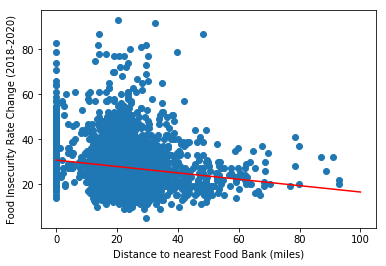

In [307]:
from sklearn.linear_model import LinearRegression
x = merged_features_FI['Dist_nearest_county_FB'].values
y = merged_features_FI['Food_Insec_Perc_Change'].values
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 100, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, c='red');
plt.xlabel("Distance to nearest Food Bank (miles)")
plt.ylabel("Food Insecurity Rate Change (2018-2020)")
# plt.savefig('linear_regression.png')

In [308]:
model.__dict__

{'fit_intercept': True,
 'normalize': False,
 'copy_X': True,
 'n_jobs': None,
 'coef_': array([-0.14210314]),
 '_residues': 374819.16684261721,
 'rank_': 1,
 'singular_': array([ 642.22249573]),
 'intercept_': 30.730836536264828}

In [309]:
sns.lmplot(x="Dist_nearest_county_FB", y="Food_Insec_Perc_Change", data=merged_features_FI);


NameError: name 'sns' is not defined

In [ ]:
sns.regplot(x="Dist_nearest_county_FB", y="Food_Insec_Perc_Change", data=merged_features_FI);


Text(0, 0.5, 'Food Bank (yes or no)')

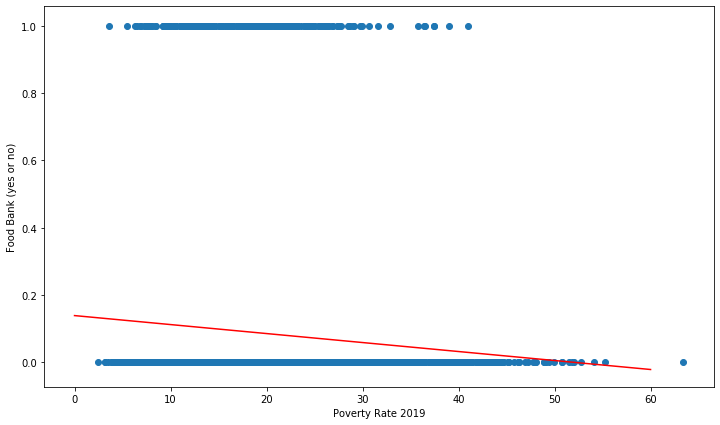

In [368]:
y = merged_features_FI['Has_FB'].values
x = merged_features_FI['PovertyRate_2019'].values
model = LinearRegression(fit_intercept=True)
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 60, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, c = 'red');
plt.xlabel("Poverty Rate 2019")
plt.ylabel("Food Bank (yes or no)")
# plt.savefig('linear_probability_poverty.png')

In [369]:
model.__dict__

{'fit_intercept': True,
 'normalize': False,
 'copy_X': True,
 'n_jobs': None,
 'coef_': array([-0.00267764]),
 '_residues': 239.20779723976386,
 'rank_': 1,
 'singular_': array([473.64076313]),
 'intercept_': 0.13786498304023248}

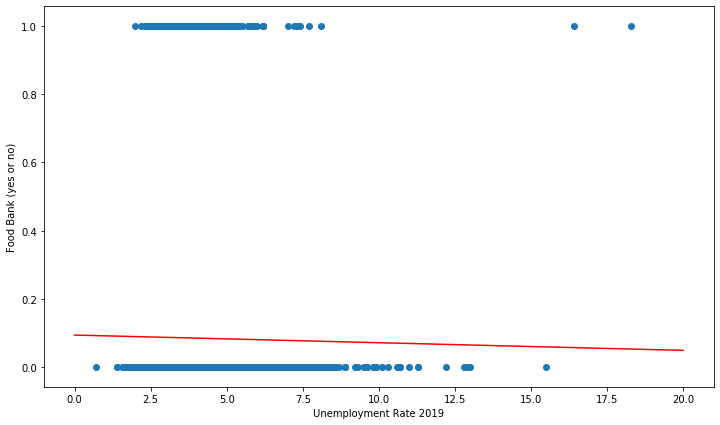

In [370]:
y = merged_features_FI['Has_FB'].values
x = merged_features_FI['Unemployment_rate_2019'].values
model = LinearRegression(fit_intercept=True)
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 20, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, c = 'red');
plt.xlabel("Unemployment Rate 2019")
plt.ylabel("Food Bank (yes or no)")
plt.savefig('linear_probability_umemployment.png')

In [371]:
model.__dict__

{'fit_intercept': True,
 'normalize': False,
 'copy_X': True,
 'n_jobs': None,
 'coef_': array([-0.00224568]),
 '_residues': 240.78520243737256,
 'rank_': 1,
 'singular_': array([78.435759]),
 'intercept_': 0.09326605513139503}

Text(0, 0.5, 'Food Bank (yes or no)')

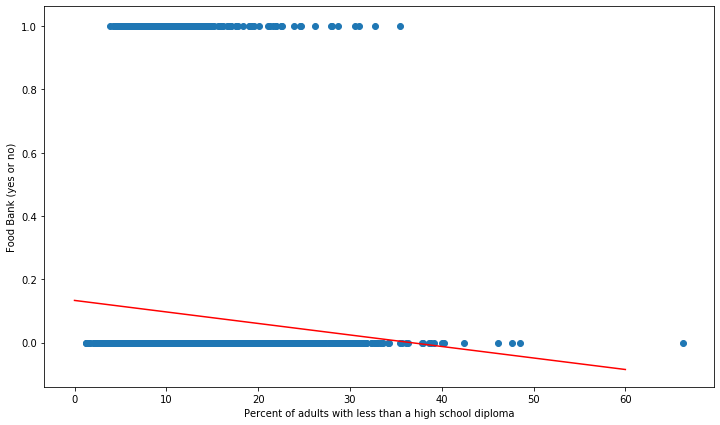

In [372]:

y = merged_features_FI['Has_FB'].values
x = merged_features_FI['Percent of adults with less than a high school diploma, 2014-18'].values
model = LinearRegression(fit_intercept=True)
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 60, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, c = 'red');
plt.xlabel("Percent of adults with less than a high school diploma")
plt.ylabel("Food Bank (yes or no)")
# plt.savefig('linear_probability_less_than_hs.png')

In [374]:
model.__dict__

{'fit_intercept': True,
 'normalize': False,
 'copy_X': True,
 'n_jobs': None,
 'coef_': array([-0.00363783]),
 '_residues': 239.1581067551152,
 'rank_': 1,
 'singular_': array([353.96961226]),
 'intercept_': 0.1332009633830952}

Text(0, 0.5, 'Food Bank (yes or no)')

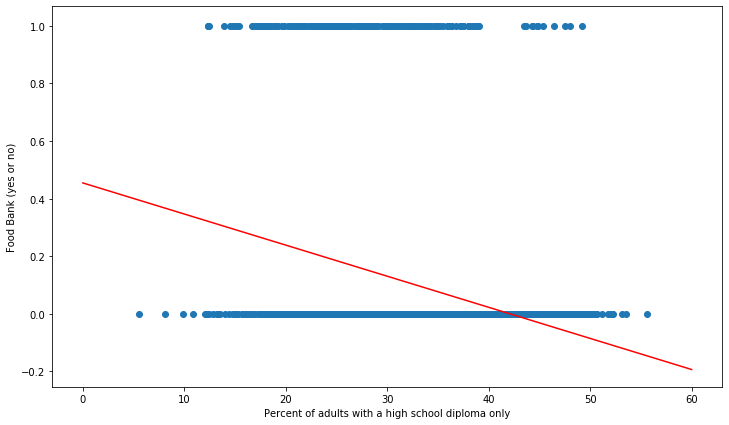

In [375]:
y = merged_features_FI['Has_FB'].values
x = merged_features_FI['Percent of adults with a high school diploma only, 2014-18'].values
model = LinearRegression(fit_intercept=True)
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 60, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, c = 'red');
plt.xlabel("Percent of adults with a high school diploma only")
plt.ylabel("Food Bank (yes or no)")
# plt.savefig('linear_probability_hs_only.png')

In [376]:
model.__dict__

{'fit_intercept': True,
 'normalize': False,
 'copy_X': True,
 'n_jobs': None,
 'coef_': array([-0.01079596]),
 '_residues': 222.0844543203536,
 'rank_': 1,
 'singular_': array([400.89285829]),
 'intercept_': 0.45453011022217615}

Text(0, 0.5, 'Food Bank (yes or no)')

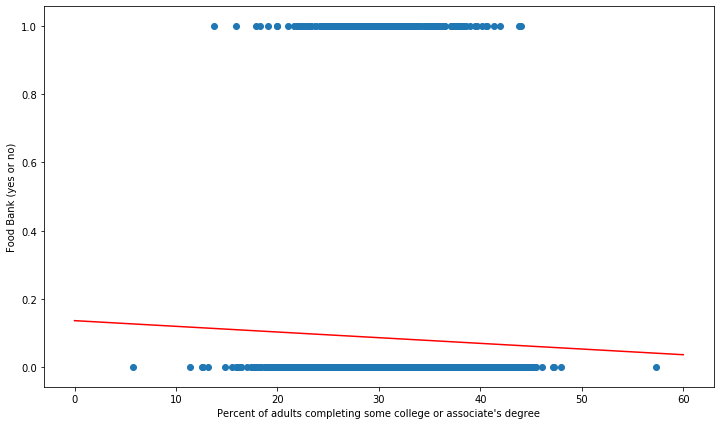

In [377]:
y = merged_features_FI['Has_FB'].values
x = merged_features_FI["Percent of adults completing some college or associate's degree, 2014-18"].values
model = LinearRegression(fit_intercept=True)
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 60, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, c = 'red');
plt.xlabel("Percent of adults completing some college or associate's degree")
plt.ylabel("Food Bank (yes or no)")
# plt.savefig('linear_probability_associates.png')

In [378]:
model.__dict__

{'fit_intercept': True,
 'normalize': False,
 'copy_X': True,
 'n_jobs': None,
 'coef_': array([-0.00166693]),
 '_residues': 240.58142735377095,
 'rank_': 1,
 'singular_': array([290.69220351]),
 'intercept_': 0.1355588320672214}

Text(0, 0.5, 'Food Bank (yes or no)')

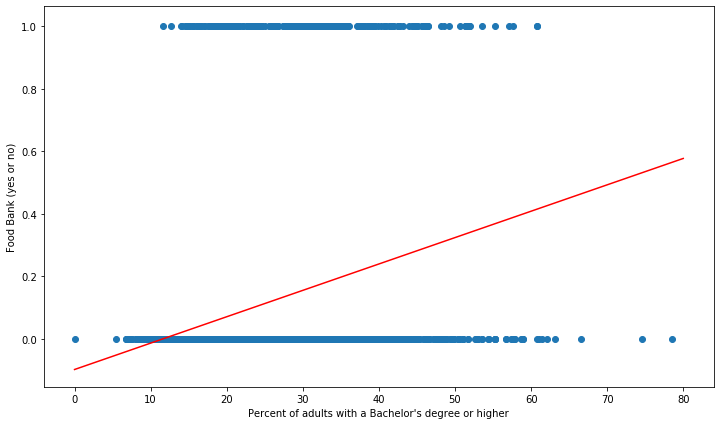

In [379]:
y = merged_features_FI['Has_FB'].values
x = merged_features_FI["Percent of adults with a bachelor's degree or higher, 2014-18"].values
model = LinearRegression(fit_intercept=True)
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 80, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, c = 'red');
plt.xlabel("Percent of adults with a Bachelor's degree or higher")
plt.ylabel("Food Bank (yes or no)")
# plt.savefig('linear_probability_bachelors.png')

In [380]:
model.__dict__

{'fit_intercept': True,
 'normalize': False,
 'copy_X': True,
 'n_jobs': None,
 'coef_': array([0.00842924]),
 '_residues': 221.16133101541783,
 'rank_': 1,
 'singular_': array([525.95304995]),
 'intercept_': -0.09738444236960447}

## Interaction Model

In [382]:
mean_college=merged_features_FI["Percent of adults with a bachelor's degree or higher, 2014-18"].median()

In [383]:
more_college=merged_features_FI.loc[merged_features_FI["Percent of adults with a bachelor's degree or higher, 2014-18"] >= mean_college ]
less_college=merged_features_FI.loc[merged_features_FI["Percent of adults with a bachelor's degree or higher, 2014-18"] < mean_college ]


In [384]:
merged_features_FI.shape

(3118, 18)

In [385]:
more_college.shape

(1570, 18)

In [386]:
less_college.shape

(1548, 18)

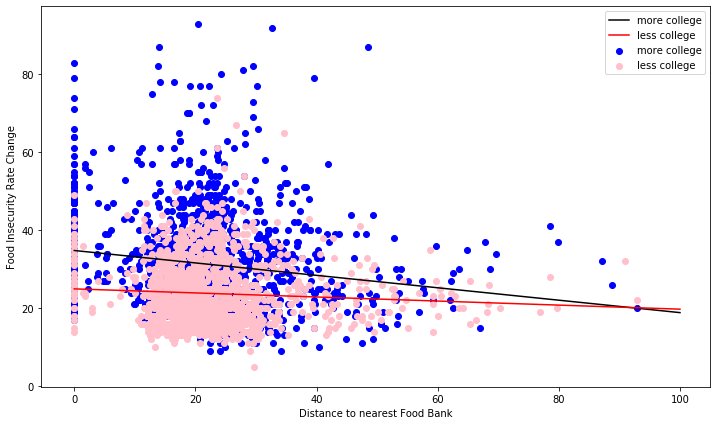

In [387]:
x = more_college['Dist_nearest_county_FB'].values
y = more_college['Food_Insec_Perc_Change'].values

x_less = less_college['Dist_nearest_county_FB'].values
y_less = less_college['Food_Insec_Perc_Change'].values

model = LinearRegression(fit_intercept=True)
model_less = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)
model_less.fit(x_less[:, np.newaxis], y_less)

xfit = np.linspace(0, 100, 1000)
yfit = model.predict(xfit[:, np.newaxis])

xfit_less = np.linspace(0, 100, 1000)
yfit_less = model_less.predict(xfit_less[:, np.newaxis])

plt.scatter(x, y, c = 'blue', label = 'more college')
plt.plot(xfit, yfit, c='black', label = 'more college');

plt.scatter(x_less, y_less, c = 'pink', label= 'less college')
plt.plot(xfit_less, yfit_less, c='red', label = 'less college');

plt.xlabel("Distance to nearest Food Bank")
plt.ylabel("Food Insecurity Rate Change")
plt.legend()


In [388]:
interaction_model=merged_features_FI.copy()

In [389]:
interaction_model['more_college']=""
interaction_model.head(1)

,FIPS,STATE,2018_Food_Insec_Rate,2020_Food_Insec_Rate,Food_Insec_Perc_Change,Has_FB,Dist_nearest_county_FB,Sate,County,Unemployment_rate_2019,Med_HH_Income_Percent_of_State_Total_2019,PovertyRate_2019,"Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults completing some college or associate's degree, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18",Population_2010,RUCC_2013,more_college
0,1001,AL,0.156,0.186,19.0,0,22.462994,AL,Autauga County,2.7,112.481888,15.9,11.3,32.6,28.4,27.7,54571.0,2.0,


In [390]:
for ind in interaction_model.index: 
#     print(type(interaction_model["Percent of adults with a bachelor's degree or higher, 2014-18"][0]))
     if ((interaction_model["Percent of adults with a bachelor's degree or higher, 2014-18"][ind]) >= mean_college):
         interaction_model["more_college"][ind]=1
     else:
        interaction_model["more_college"][ind]=0
     
interaction_model.head()

/Users/chrisachuu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/chrisachuu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,FIPS,STATE,2018_Food_Insec_Rate,2020_Food_Insec_Rate,Food_Insec_Perc_Change,Has_FB,Dist_nearest_county_FB,Sate,County,Unemployment_rate_2019,Med_HH_Income_Percent_of_State_Total_2019,PovertyRate_2019,"Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults completing some college or associate's degree, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18",Population_2010,RUCC_2013,more_college
0,1001,AL,0.156,0.186,19.0,0,22.462994,AL,Autauga County,2.7,112.481888,15.9,11.3,32.6,28.4,27.7,54571.0,2.0,1
1,1003,AL,0.129,0.163,26.0,0,24.419671,AL,Baldwin County,2.7,115.645828,13.5,9.7,27.6,31.3,31.3,182265.0,3.0,1
2,1005,AL,0.219,0.251,15.0,0,23.254040,AL,Barbour County,3.8,69.482918,41.0,27.0,35.7,25.1,12.2,27457.0,6.0,0
3,1007,AL,0.151,0.189,25.0,0,25.777246,AL,Bibb County,3.1,92.557610,25.9,16.8,47.3,24.4,11.5,22915.0,1.0,0
4,1009,AL,0.136,0.161,19.0,0,20.318000,AL,Blount County,2.7,102.184624,21.0,19.8,34.0,33.5,12.6,57322.0,1.0,0


No handles with labels found to put in legend.


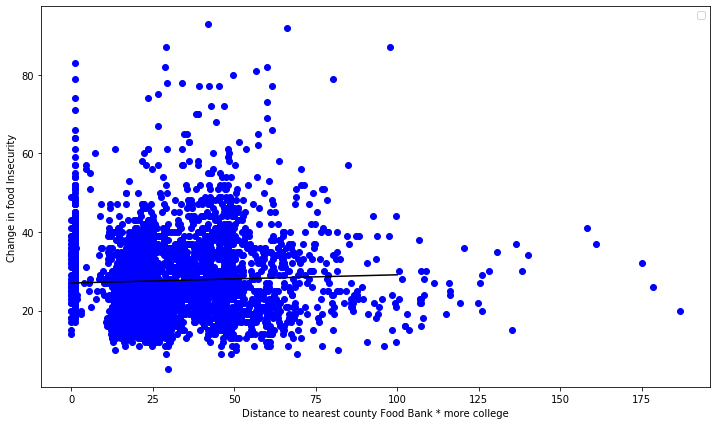

In [391]:
y = interaction_model['Food_Insec_Perc_Change'].values
x = (interaction_model['Dist_nearest_county_FB'] + 
        interaction_model['more_college'] + 
     (interaction_model['Dist_nearest_county_FB']*interaction_model['more_college'])).values

model = LinearRegression(fit_intercept=True)

results = model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 100, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y, c = 'blue' )
plt.plot(xfit, yfit, c='black')

plt.xlabel("Distance to nearest county Food Bank * more college")
plt.ylabel("Change in food Insecurity")
plt.legend()

In [392]:
results.__dict__

{'fit_intercept': True,
 'normalize': False,
 'copy_X': True,
 'n_jobs': None,
 'coef_': array([0.02092145]),
 '_residues': 382497.0088863687,
 'rank_': 1,
 'singular_': array([1219.43509225]),
 'intercept_': 26.99679565532366}

In [393]:
interaction_model['more_college'] = pd.to_numeric(interaction_model["more_college"], downcast="float")
type(interaction_model['more_college'][0])


numpy.float32

In [394]:
interaction_model["dist*more_college"] = interaction_model["Dist_nearest_county_FB"] * interaction_model["more_college"]
interaction_model.head(1)

,FIPS,STATE,2018_Food_Insec_Rate,2020_Food_Insec_Rate,Food_Insec_Perc_Change,Has_FB,Dist_nearest_county_FB,Sate,County,Unemployment_rate_2019,Med_HH_Income_Percent_of_State_Total_2019,PovertyRate_2019,"Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults completing some college or associate's degree, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18",Population_2010,RUCC_2013,more_college,dist*more_college
0,1001,AL,0.156,0.186,19.0,0,22.462994,AL,Autauga County,2.7,112.481888,15.9,11.3,32.6,28.4,27.7,54571.0,2.0,1.0,22.462994


In [395]:
import statsmodels.api as sm

y = interaction_model['Food_Insec_Perc_Change'].values
X = interaction_model[['Dist_nearest_county_FB', 'more_college', 'dist*more_college']]
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     167.4
Date:                Sat, 06 Feb 2021   Prob (F-statistic):          1.28e-100
Time:                        17:29:09   Log-Likelihood:                -11692.
No. Observations:                3118   AIC:                         2.339e+04
Df Residuals:                    3114   BIC:                         2.342e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     24

/Users/chrisachuu/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


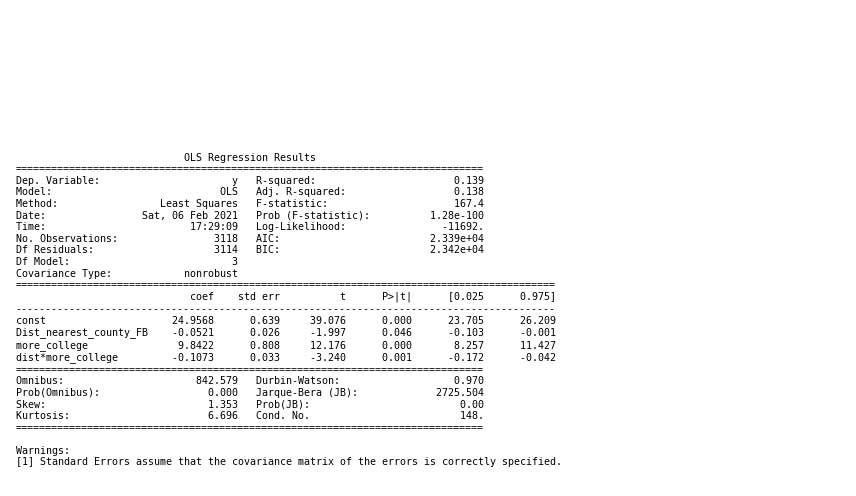

In [396]:
plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(est2.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('output.png')

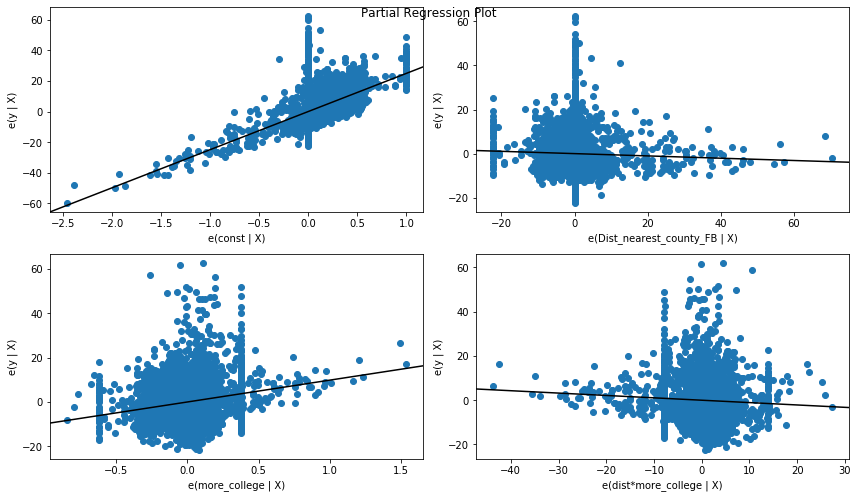

In [397]:
fig = sm.graphics.plot_partregress_grid(est2)
fig.tight_layout(pad=1.0)

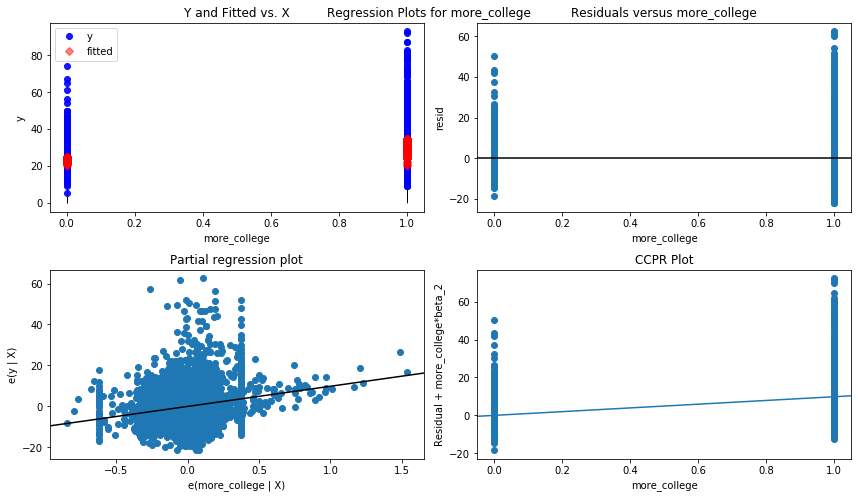

In [398]:
fig = sm.graphics.plot_regress_exog(est2, "more_college")
fig.tight_layout(pad=1.0)

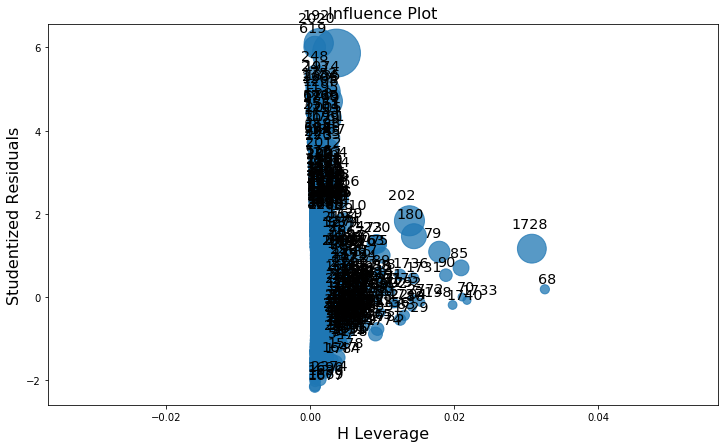

In [399]:
figure1 = sm.graphics.influence_plot(est2)

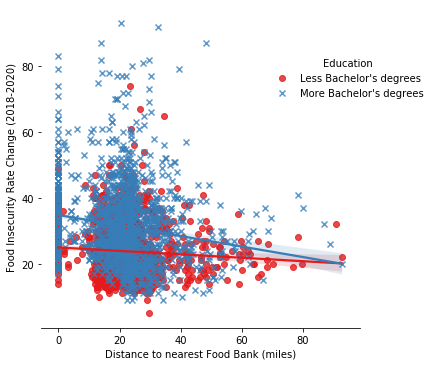

In [400]:
ax = sns.lmplot(x="Dist_nearest_county_FB", y="Food_Insec_Perc_Change", hue="more_college", data=interaction_model,
           markers=["o", "x"], palette="Set1");
ax.set(xlabel='Distance to nearest Food Bank (miles)', ylabel='Food Insecurity Rate Change (2018-2020)')
# title
new_title = 'Education'
ax._legend.set_title(new_title)
# replace labels
new_labels = ["Less Bachelor's degrees", "More Bachelor's degrees"]
for t, l in zip(ax._legend.texts, new_labels): t.set_text(l)
ax.despine(left=True)

leg = ax._legend
leg.set_bbox_to_anchor([0.8, 0.8])  # coordinates of lower left of bounding box
leg._loc = 10
ax.savefig('linear_regression_more_less_college.png')

In [ ]:
model.__dict__

In [ ]:
results.__dict__

In [ ]:
mean_hs_only=merged_features_FI["Percent of adults with a high school diploma only, 2014-18"].mean()

In [ ]:
more_hs_only=merged_features_FI.loc[merged_features_FI["Percent of adults with a high school diploma only, 2014-18"] >= mean_hs_only ]
less_hs_only=merged_features_FI.loc[merged_features_FI["Percent of adults with a high school diploma only, 2014-18"] < mean_hs_only ]


In [ ]:
x = more_hs_only['Dist_nearest_county_FB'].values
y = more_hs_only['Food_Insec_Perc_Change'].values

x_less = less_hs_only['Dist_nearest_county_FB'].values
y_less = less_hs_only['Food_Insec_Perc_Change'].values

model = LinearRegression(fit_intercept=True)
model_less = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)
model_less.fit(x_less[:, np.newaxis], y_less)

xfit = np.linspace(0, 100, 1000)
yfit = model.predict(xfit[:, np.newaxis])

xfit_less = np.linspace(0, 100, 1000)
yfit_less = model_less.predict(xfit_less[:, np.newaxis])

plt.scatter(x, y, c = 'blue', label = 'more hs only')
plt.plot(xfit, yfit, c='black', label = 'more hs only');

plt.scatter(x_less, y_less, c = 'pink', label= 'less hs only')
plt.plot(xfit_less, yfit_less, c='red', label = 'less hs only');

plt.xlabel("Distance to nearest Food Bank")
plt.ylabel("Food Insecurity Rate Change")
plt.legend()